# TFG

In [170]:
# # Always run first
# import os
# import logging

# # Set the environment variable to enable debugging
# os.environ['TFG_DEBUG'] = '1'
# del os.environ['TFG_DEBUG'] # Delete it for the time being

# # if os.getenv('TFG_DEBUG', '1'):
# if os.getenv('TFG_DEBUG') == '1':
#     logging.basicConfig(level=logging.DEBUG)
#     logger = logging.getLogger(__name__)
#     logger.debug("Debugging is enabled. [Main IPYNB]")

# logging.basicConfig(level=logging.WARNING)

# # Remove the environment variable after use
# # del os.environ['TFG_DEBUG']

# Always run first - Proper logging setup
import os
import logging

# Clear any existing handlers to avoid duplicate logs
for handler in logging.root.handlers[:]:
    logging.root.removeHandler(handler)

# Set up logging based on environment variable
if os.getenv('TFG_DEBUG') == '1':
    logging.basicConfig(
        level=logging.DEBUG,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )
else:
    logging.basicConfig(
        level=logging.WARNING,
        format='%(asctime)s - %(name)s - %(levelname)s - %(message)s'
    )

# Get logger for this module
logger = logging.getLogger(__name__)

# Test logging
logger.debug("Debugging is enabled")
logger.warning("This warning should always appear")

2025-04-14 23:34:39,370 - __main__ - WARNING - This warning should always appear


In [ ]:
# Main libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os

# Preprocessing
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PolynomialFeatures
from sklearn.preprocessing import OneHotEncoder

# Feature selection
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression
from sklearn.feature_selection import mutual_info_regression
from sklearn.feature_selection import SelectFromModel
from sklearn.feature_selection import RFE
from sklearn.feature_selection import RFECV
from sklearn.feature_selection import VarianceThreshold

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.pipeline import FeatureUnion

# Cross-validation
from sklearn.model_selection import cross_val_score

# Package import Cache clear
import sys
sys.path.append('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code')

import importlib
import utils.basic_plots
importlib.reload(utils.basic_plots)
importlib.reload(utils.mini_models)

# Utilities
# Do proper imports not this
# from utils.sliding_window import *
from code.utils.matrix_builder import create_weight_matrix, create_weight_matrix_with_features
# from utils.basic_plots import *
from utils.basic_plots import plot_actual_vs_predicted, plot_error, plot_feature_importance
from utils.mini_models import mini_model

# Models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import lightgbm as lgb

# Testing split
from sklearn.model_selection import train_test_split

# Evaluation
from sklearn.metrics import mean_squared_error, r2_score

testing the matrix build

In [172]:
# read data
csv_hour_file = '../data/hour_14_metrics.csv'
df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df = df[['Datetime', 'MarginalES']]

# Date range for the training matrix
# train_start_date = '2018-01-01'
train_start_date = '2018-12-25'
train_end_date = '2022-01-01'

train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]



##### 

# probar con eso tambien
# error de retorno con 0s
#! sumarle 0,001 a todo para que nunca sea 0
#! limpiar numeros negativos
    # subsanado con limpieza y posterior interpolacion

# benchmark 1 precios absolutos - precios CHECK
# benchmark 2 precios relativos - retornos CHECK
# benchmark 3 indicadores tecnicos
    # 1. media movil
    # 2. momentum
    # 3. RSI
    # 4. añdir los precios absolutos o relativos
# benchmark 4 random forest - probably not good because it doesn't detect peaks - hace medias, entonces nunca sale el valor mas bajo



# precios reales y precios relativos

# Sliding window size
window_size = 3

In [109]:
# Create sliding window matrix - method from utils.sliding_window
X_train, y_train = create_weight_matrix(train_subset_df, window_size)

Print to check the matrix

In [110]:
# print the shape of the matrix
print(X_train.shape, y_train.shape)

# print the actual matrix
print(X_train.head())
print(y_train.head())

# Lasso
# .coef_ da los pesos del modelo lineal
# las que sean cero o muy bajitas no van a tener peso en la decision

(1099, 3) (1099,)
       0      1      2
0  66.58  67.20  68.12
1  67.20  68.12  64.64
2  68.12  64.64  57.39
3  64.64  57.39  63.91
4  57.39  63.91  65.22
0    64.64
1    57.39
2    63.91
3    65.22
4    65.88
dtype: float64


## Build a simple regression model and train with the matrix

In [111]:
# Build a simple regression model and train with the matrix
model_lr = LinearRegression()

# Train with the training subset
model_lr.fit(X_train, y_train)

#! en vez de score llamar a predict y guardar los valors

#! bucle for
# predict


# Fit with the next subset up to the row before prediction

# Date range for the testing (fit) matrix
test_start_date = '2022-01-02'
# test_end_date = '2025-01-01'
test_end_date = '2025-03-17'

test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# Create sliding window matrix
X_test, y_test = create_weight_matrix(test_subset_df, window_size)

#! ERROR - you cannot fit the regression again with test data - its retraining the whole thing
#! Fit the model w test data
# model_lr.fit(X_test, y_test)

# llamar a fit con toda la matriz, con la anchura ventana deslizante
# y altura num of days back

#! me falta score con test
# llama a predict con la x y compara con mis ys
# guardar errores y predicciones
# std dev
# percentil

#! pickle para guardar sets de numeros en vez de numpy ??

# Predict the target values
# y_pred = model_lr.predict(X) # SOLO la lonchita
# predict o score para otros modelos
####### sólo predict con la ultima fila
# y_pred = model_lr.predict(X_test) #! SOLO la lonchita ???
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# mirar tambien Expectation Short-Fall
# mirar cual seria la peor prediccion
# la media del 5% peor de resultados
# buscar que el caso peor no sea tan malo?

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

###### Predict con la ultima fila
# llamar a predict con solo la ultima fila (ancho)
X_last = X_test.iloc[-1, :].values.reshape(1, -1)
y_pred = model_lr.predict(X_last)
# mse = mean_squared_error(y_test, y_pred)
print(f"x_last: {X_last}")
print(f"y_pred: {y_pred}")

# Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

x_last: [[70.01 95.12 18.82]]
y_pred: [36.46482644]


## Now with the return values

Pasos a seguir

Calcular el retorno (en vez de usar los precios)
Interpolar (rellenar valores)
Coger el set completo y partir en dos

Entrenar con la primera mitad (bloque 1 de datos)
    - Train

Coger todo el set de datos anterior a la fila que queremos (bloque 2 de datos)
    - Fit

Hacer predict de la siguiente fila al set de datos anterior (resultado a predecir)


In [8]:
# window_size = 30

# # read return data
# csv_hour_file = '../data/clean_return_data.csv'
# df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
# df = df[['Datetime', 'Return']]

# # Date range for the training matrix
# # train_start_date = '2018-01-01'
# train_start_date = '2018-12-25'
# train_end_date = '2022-01-01'

# train_subset_df = df[(df['Datetime'] >= train_start_date) & (df['Datetime'] <= train_end_date)]

# # Create sliding window matrix
# X_train, y_train = create_sliding_window(train_subset_df, window_size)

# # Build a simple regression model and train with the matrix
# model_lr = LinearRegression()

# # Train with the training subset
# # model_lr.train(X_train, y_train)
# model_lr.fit(X_train, y_train)


# # Fit with the next subset up to the row before prediction

# # Date range for the testing (fit) matrix
# test_start_date = '2022-01-02'
# # test_end_date = '2025-01-01'
# test_end_date = '2025-03-17'

# test_subset_df = df[(df['Datetime'] >= test_start_date) & (df['Datetime'] <= test_end_date)]

# # Create sliding window matrix
# X_test, y_test = create_sliding_window(test_subset_df, window_size)

# #! no usar sólo la lonchita - usar toda la matriz de la que considere que tengo memoria
# #! programar distintas ventanas fijas de memoria
# #! mirar el error que dan las distintas memorias y comparar
# y_pred = model_lr.predict(X_test) # SOLO la lonchita ??? NO error
# mse = mean_squared_error(y_test, y_pred)
# print(f"Test MSE: {mse}")

# # linear regressor has mean error 0 that why we do error cuadratico o absoluto

# # llamar a predict con solo la ultima fila (ancho)
# X_last = X_test.iloc[-1, :].values.reshape(1, -1)
# y_pred = model_lr.predict(X_last)
# # mse = mean_squared_error(y_test, y_pred)
# print(f"x_last: {X_last}")
# print(f"y_pred: {y_pred}")

In [113]:
# For later on...
#! Build a simple random forest model and train with the matrix

# model_rf = sklearn RandomForest()
# model_rf.fit(X, y)

# # llamar a fit con toda la matriz, con la anchura ventana deslizante
# # y altura num of days back

# # Predict the target values
# y_pred = model_rf.predict(X)

# # llamar a predict con solo una fila (ancho)

# # Calculate the mean squared error and R2 score
# mse = mean_squared_error(y, y_pred)
# print('Mean squared error:', mse)
# r2 = r2_score(y, y_pred)
# print('R2 score:', r2)

# # Print 20 y and y_pred to visualize the difference
# print('Actual vs Predicted')
# print(pd.DataFrame({'Actual': y, 'Predicted': y_pred}).head(20))

# # Plot the actual vs. predicted values
# plt.figure(figsize=(10, 6))
# plt.plot(subset_df['Datetime'][window_size:], y, label='Actual')
# plt.plot(subset_df['Datetime'][window_size:], y_pred, label='Predicted')
# plt.legend()
# plt.show()

## Añadiendo columnas
Calcularemos varias metricas con la libreria "ta" - technical analysis

### Próximos pasos
- Añadir columnas de métricas de precios
  - Media móvil corta (a pocos días)
  - Media móvil larga (a muchos días)
  - RSI
  - Volatilidad
  - Momentum
- Probar regresión otra vez
- Verificar con
  - MSE
  - RMSE
  - 95th percentil
  - R² modificado?
- Mirar foto - usar en el sumatorio de abajo, las etiquetas de train
- Probar Lasso
- Mirar error (distintas métricas)
- Mirar pesos que escoge - aprender del modelo


In [114]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

window_size = 30

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
# csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14'
# read return data
# csv_hour_file = '../data/ta_metrics/new_return_metrics_hour_14.csv'

df = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

# split in two
# Train
# Test

#! Expandir esto para incluir nuevas metricas (mas columnas)
df_prices = df[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df.columns[1:]  # Exclude 'Datetime'
df = df[['Datetime'] + list(feature_columns)]

In [115]:
print(df_prices)

                Datetime  MarginalES
0    2018-12-25 14:00:00       66.58
1    2018-12-26 14:00:00       67.20
2    2018-12-27 14:00:00       68.12
3    2018-12-28 14:00:00       64.64
4    2018-12-29 14:00:00       57.39
...                  ...         ...
2052 2025-03-13 14:00:00       95.12
2053 2025-03-14 14:00:00       18.82
2054 2025-03-15 14:00:00        0.00
2055 2025-03-16 14:00:00       11.37
2056 2025-03-17 14:00:00       50.24

[2057 rows x 2 columns]


In [116]:
print(df)

                Datetime  MarginalES      SMA_3   SMA_5      SMA_7     SMA_14  \
0    2018-12-25 14:00:00       66.58  66.410000  65.486  65.254286  65.138571   
1    2018-12-26 14:00:00       67.20  66.806667  66.286  65.697143  65.027857   
2    2018-12-27 14:00:00       68.12  67.300000  66.910  66.107143  65.175000   
3    2018-12-28 14:00:00       64.64  66.653333  66.636  66.312857  65.188571   
4    2018-12-29 14:00:00       57.39  63.383333  64.786  65.225714  64.780714   
...                  ...         ...        ...     ...        ...        ...   
2052 2025-03-13 14:00:00       95.12  81.000000  65.484  48.034286  52.265000   
2053 2025-03-14 14:00:00       18.82  61.316667  67.828  49.605714  47.885714   
2054 2025-03-15 14:00:00        0.00  37.980000  52.364  49.462857  45.051429   
2055 2025-03-16 14:00:00       11.37  10.063333  39.064  50.072857  43.006429   
2056 2025-03-17 14:00:00       50.24  20.536667  35.110  46.204286  40.149286   

         SMA_30     SMA_60 

In [173]:
# Function to create the weight matrix, with the sliding window, and the columns of extra data points

# Right Alligned
# x1 x2 x3 sma_3
# sma_3 = x1+x2+x3 / 3
# def create_weight_matrix_more_columns(dataframe, window_size):
#     X, y = [], []
    
#     df_prices = dataframe[['Datetime', 'MarginalES']]
#     df_features = dataframe.iloc[:, 2:]  # Exclude 'Datetime' and 'MarginalES'
    
#     for i in range(window_size, len(df_prices)):
#         # Extract sliding window for prices (right-aligned)
#         window = df_prices.iloc[i-window_size:i, 1:].values.flatten()
        
#         # Extract corresponding feature row
#         feature_row = df_features.iloc[i-1].values.flatten()
        
#         # Concatenate sliding window prices with feature row
#         X.append(np.concatenate((window, feature_row)))
#         y.append(df_prices.iloc[i, 1])
    
#     return pd.DataFrame(X), pd.Series(y)

X_0313, y_0313 = create_weight_matrix_with_features(df, window_size=3)

print(X_0313)

      price_t-3  price_t-2  price_t-1
0          2.30      48.02      52.00
1         48.02      52.00      48.19
2         52.00      48.19      52.02
3         48.19      52.02      52.07
4         52.02      52.07      54.07
...         ...        ...        ...
2626      77.32      77.87      70.01
2627      77.87      70.01      95.12
2628      70.01      95.12      18.82
2629      95.12      18.82       0.00
2630      18.82       0.00      11.37

[2631 rows x 3 columns]


In [118]:
print(y_0313)

0       64.64
1       57.39
2       63.91
3       65.22
4       65.88
        ...  
2049    95.12
2050    18.82
2051     0.00
2052    11.37
2053    50.24
Length: 2054, dtype: float64


In [119]:
# Build a simple regression model and train with the matrix
model_lr_0313 = LinearRegression()

# Split X and y in half for training and testing
split_idx = len(X_0313) // 2
X_train_0313, X_test_0313 = X_0313.iloc[:split_idx], X_0313.iloc[split_idx:]
y_train_0313, y_test_0313 = y_0313.iloc[:split_idx], y_0313.iloc[split_idx:]

# Train with the training subset
model_lr_0313.fit(X_train_0313, y_train_0313)

# testing this
y_pred_0313 = model_lr_0313.predict(X_test_0313) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313, y_pred_0313)
print(f"Test MSE: {mse}")

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313 = X_test_0313.iloc[-1, :].values.reshape(1, -1)
y_pred_0313 = model_lr_0313.predict(X_last_0313)
# mse = mean_squared_error(y_0313, y_pred_0313)
print(f"x_last_0313: {X_last_0313}")
print(f"y_pred_0313: {y_pred_0313}")

Test MSE: 4226.153038888238
x_last_0313: [[ 18.82         0.          11.37        10.06333333  39.064
   50.07285714  43.00642857  45.961       60.5865      66.43377778
   64.10238889  44.86916667  18.08092863  27.42915893  32.62976498
   40.32056101  47.81725882 -88.04667788 -85.39874149  60.14084507
  -77.36863057 -71.575      -82.50769231  38.63524426  41.4453365
   45.33512792]]
y_pred_0313: [54.00994039]


## Lasso
- mirar error (distintas metricas)
- mirar pesos que escoge - aprender del modelo

In [120]:
# Añadir columnas de metricas de precios
    # media movil corta (a pocos dias)
    # media movil larga (a muchos dias)
    # RSI
    # volatilidad
    # momentum

# probar regresion otra vez
    # verificar con
    # mse
    # rmse
    # 95th percentil

# R^2 modificado?
# mirar foto - usar en el sumatorio de abajo, las etiquetas de train

# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_lasso = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_lasso_prices = df_lasso[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_lasso.columns[1:]  # Exclude 'Datetime'
df_lasso = df_lasso[['Datetime'] + list(feature_columns)]

In [ ]:
X_0313_lasso, y_0313_lasso = create_weight_matrix_with_features(df_lasso, window_size=3)

In [122]:
# Build a simple regression model and train with the matrix
model_lasso_0313 = Lasso()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_lasso) // 2
X_train_0313_lasso, X_test_0313_lasso = X_0313_lasso.iloc[:split_idx], X_0313_lasso.iloc[split_idx:]
y_train_0313_lasso, y_test_0313_lasso = y_0313_lasso.iloc[:split_idx], y_0313_lasso.iloc[split_idx:]

print(X_test_0313_lasso)

# Train with the training subset
model_lasso_0313.fit(X_train_0313_lasso, y_train_0313_lasso)

# testing this
y_pred_0313_lasso = model_lasso_0313.predict(X_test_0313_lasso) #! SOLO la lonchita ???
mse = mean_squared_error(y_test_0313_lasso, y_pred_0313_lasso)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???

# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_lasso = X_test_0313_lasso.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_lasso = X_test_0313_lasso.
y_pred_0313_lasso = model_lasso_0313.predict(X_last_0313_lasso)
# mse = mean_squared_error(y_0313_lasso, y_pred_0313_lasso)
print(f"x_last_0313_lasso: {X_last_0313_lasso}")
# print(f"y_actual_0313_lasso: {y_actual_0313_lasso}")
print(f"y_pred_0313_lasso: {y_pred_0313_lasso}")

          0       1       2           3        4           5           6   \
1027  198.41  193.73  188.69  193.610000  201.760  196.632857  198.018571   
1028  193.73  188.69  179.70  187.373333  195.356  198.198571  197.037857   
1029  188.69  179.70  183.27  183.886667  188.760  195.967143  189.628571   
1030  179.70  183.27  188.69  183.886667  186.816  192.677143  189.620714   
1031  183.27  188.69  190.70  187.553333  186.210  189.027143  187.809286   
...      ...     ...     ...         ...      ...         ...         ...   
2049   77.32   77.87   70.01   75.066667   46.660   43.015714   51.827857   
2050   77.87   70.01   95.12   81.000000   65.484   48.034286   52.265000   
2051   70.01   95.12   18.82   61.316667   67.828   49.605714   47.885714   
2052   95.12   18.82    0.00   37.980000   52.364   49.462857   45.051429   
2053   18.82    0.00   11.37   10.063333   39.064   50.072857   43.006429   

              7           8           9   ...          16          17  \
10

In [123]:
# Get the coefficients (weights)
print(model_lasso_0313.coef_)

# Get the intercept (bias term)
print(model_lasso_0313.intercept_)

[-0.00000000e+00  3.97052723e-02  4.86430415e-01  0.00000000e+00
 -9.61532855e-01  1.35026253e+00 -0.00000000e+00  0.00000000e+00
  1.38355989e-01  2.54449188e-02  0.00000000e+00 -5.87676183e-02
  0.00000000e+00  0.00000000e+00 -0.00000000e+00 -0.00000000e+00
  0.00000000e+00 -7.23230653e-04 -4.11398233e-04  9.32660027e-05
  2.29405100e-04 -1.52468269e-04  2.27829254e-04  6.13576575e-02
  0.00000000e+00 -0.00000000e+00]
-3.52525393844347


## Ridge

In [ ]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_ridge = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_ridge_prices = df_ridge[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_ridge.columns[1:]  # Exclude 'Datetime'
df_ridge = df_ridge[['Datetime'] + list(feature_columns)]

X_0313_ridge, y_0313_ridge = create_weight_matrix_with_features(df_ridge, window_size=3)

In [125]:
# Build a simple regression model and train with the matrix
model_ridge_0313 = Ridge()

# split in two
# Train
# Test

# Split X and y in half for training and testing
split_idx = len(X_0313_ridge) // 2
X_train_0313_ridge, X_test_0313_ridge = X_0313_ridge.iloc[:split_idx], X_0313_ridge.iloc[split_idx:]
y_train_0313_ridge, y_test_0313_ridge = y_0313_ridge.iloc[:split_idx], y_0313_ridge.iloc[split_idx:]

print(X_test_0313_ridge)

# Train with the training subset
model_ridge_0313.fit(X_train_0313_ridge, y_train_0313_ridge)

# testing this
y_pred_0313_ridge = model_ridge_0313.predict(X_test_0313_ridge) # SOLO la ultima fila
mse = mean_squared_error(y_test_0313_ridge, y_pred_0313_ridge)
print(f"Test MSE: {mse}")

#! Pending on 95th, 99th percentile errors ???


# linear regressor has mean error 0 that why we do error cuadratico o absoluto

# llamar a predict con solo la ultima fila (ancho)
X_last_0313_ridge = X_test_0313_ridge.iloc[-1, :].values.reshape(1, -1)
# y_actual_0313_ridge = X_test_0313_ridge.
y_pred_0313_ridge = model_ridge_0313.predict(X_last_0313_ridge)
# mse = mean_squared_error(y_0313_ridge, y_pred_0313_ridge)
print(f"x_last_0313_ridge: {X_last_0313_ridge}")
# print(f"y_actual_0313_ridge: {y_actual_0313_ridge}")
print(f"y_pred_0313_ridge: {y_pred_0313_ridge}")

          0       1       2           3        4           5           6   \
1027  198.41  193.73  188.69  193.610000  201.760  196.632857  198.018571   
1028  193.73  188.69  179.70  187.373333  195.356  198.198571  197.037857   
1029  188.69  179.70  183.27  183.886667  188.760  195.967143  189.628571   
1030  179.70  183.27  188.69  183.886667  186.816  192.677143  189.620714   
1031  183.27  188.69  190.70  187.553333  186.210  189.027143  187.809286   
...      ...     ...     ...         ...      ...         ...         ...   
2049   77.32   77.87   70.01   75.066667   46.660   43.015714   51.827857   
2050   77.87   70.01   95.12   81.000000   65.484   48.034286   52.265000   
2051   70.01   95.12   18.82   61.316667   67.828   49.605714   47.885714   
2052   95.12   18.82    0.00   37.980000   52.364   49.462857   45.051429   
2053   18.82    0.00   11.37   10.063333   39.064   50.072857   43.006429   

              7           8           9   ...          16          17  \
10

In [126]:
# Get the coefficients (weights)
print(model_ridge_0313.coef_)

# Get the intercept (bias term)
print(model_ridge_0313.intercept_)

[ 1.56445013e-04 -7.63577678e-01 -2.29910070e+00 -1.02084065e+00
 -1.67716248e+00  2.90427296e+00  9.13063312e-01 -8.55665430e-01
 -4.25424877e-01 -7.56570868e-02  5.84133381e-02 -1.14686852e-01
  9.75737644e+00 -9.79163220e-01 -5.75200331e+00 -2.14902160e+00
  3.49277389e+00 -8.77525474e-04 -2.54436353e-04 -1.98173764e-04
  3.59788517e-04 -2.92601203e-04  2.31507483e-04  1.15942049e+00
 -2.17093094e+00  1.25391523e+00]
-12.22493396139582


In [127]:
# # Scatter plot of actual vs predicted values
# plt.figure(figsize=(8, 6))
# plt.scatter(y_test_0313_ridge, y_pred_0313_ridge, alpha=0.5, color="blue", label="Predicted vs Actual")
# plt.plot([min(y_test_0313_ridge), max(y_test_0313_ridge)], [min(y_test_0313_ridge), max(y_test_0313_ridge)], color="red", linestyle="dashed", label="Perfect Fit")
# plt.xlabel("Actual Values")
# plt.ylabel("Predicted Values")
# plt.title("Random Forest: Predictions vs Actual")
# plt.legend()
# plt.grid(True)
# plt.show()


## Random Forest

In [ ]:
# read prices data
csv_hour_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

df_randomforest = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])

df_randomforest_prices = df_randomforest[['Datetime', 'MarginalES']]

# Select all relevant columns except 'Datetime'
feature_columns = df_randomforest.columns[1:]  # Exclude 'Datetime'
df_randomforest = df_randomforest[['Datetime'] + list(feature_columns)]

X_0313_randomforest, y_0313_randomforest = create_weight_matrix_with_features(df_randomforest, window_size=3)

In [129]:
# Split data
X_train_0313_randomforest, X_test_0313_randomforest, y_train_0313_randomforest, y_test_0313_randomforest = train_test_split(X_0313_randomforest, y_0313_randomforest, test_size=0.2, random_state=42)

# Train Random Forest
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train_0313_randomforest, y_train_0313_randomforest)

# Predictions
X_last_0313_randomforest = X_test_0313_randomforest.iloc[-1, :].values.reshape(1, -1)
y_pred_0313_randomforest = rf.predict(X_test_0313_randomforest)
print(f"x_last_0313_randomforest: {X_last_0313_randomforest}")
print(f"y_pred_0313_randomforest: {y_pred_0313_randomforest}")

# Evaluate model
mse = mean_squared_error(y_test_0313_randomforest, y_pred_0313_randomforest)
r2 = r2_score(y_test_0313_randomforest, y_pred_0313_randomforest)

print(f"Random Forest MSE: {mse:.4f}")
print(f"Random Forest R²: {r2:.4f}")

#! Pending on 95th, 99th percentile errors ???

x_last_0313_randomforest: [[140.37       114.1        149.76       134.74333333 146.178
  152.91       144.15571429 129.28833333 113.696      105.55433333
   85.12344444  63.54377778 140.69363966 142.86407028 144.08886906
  142.03518212 132.22444532   6.46950092 -14.78320246  -3.89527049
   15.6626506   18.48101266  43.29729213  53.15319391  52.92343513
   53.55157464]]
y_pred_0313_randomforest: [ 33.6732  28.496   99.7491  65.7525 212.4098  44.3405  28.2197  30.1935
 108.7983 321.5384 100.8523  84.9465 181.5139 119.1919  53.9262  35.7718
 116.3988  96.651  402.5596 183.6243 183.9529  23.593   35.4156  51.7268
  50.5639  36.8705  34.9336  96.3897 128.1119  24.5739  58.774   41.1034
  53.2723  97.3349  45.98    43.4317 109.0216  34.5123  65.2278  79.4146
  26.7283  48.8596  50.9208  44.2915 142.1758  69.3832  77.6038  19.8414
 133.3849  36.5485  30.7886  32.1043  43.4779 141.0266  95.5656  67.7354
 185.1936  45.4534 129.5057  10.0743  56.9804  22.3028  33.2442  37.7886
  33.1927 120.671

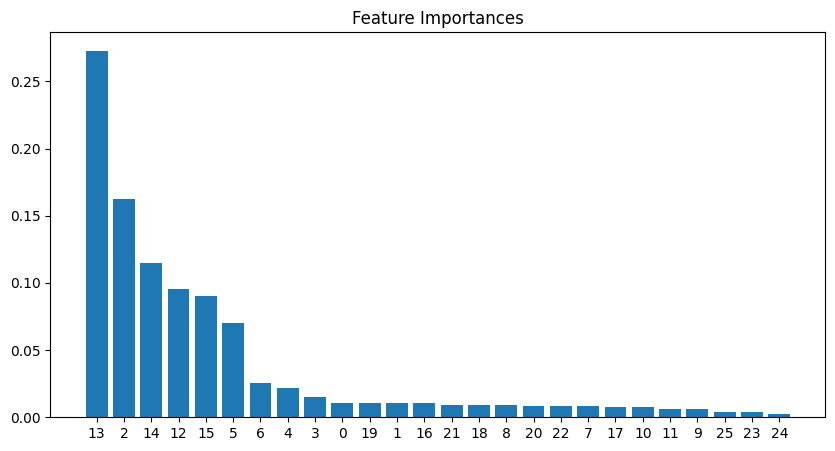

In [130]:
# Get feature importance
feature_importance = rf.feature_importances_

# Sort and plot
indices = np.argsort(feature_importance)[::-1]
plt.figure(figsize=(10, 5))
plt.title("Feature Importances")
plt.bar(range(X_0313_randomforest.shape[1]), feature_importance[indices], align="center")
plt.xticks(range(X_0313_randomforest.shape[1]), indices)
plt.show()

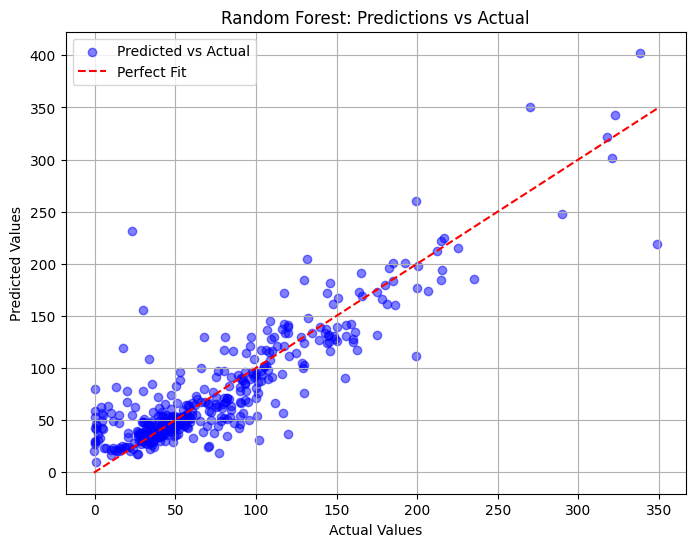

In [131]:
# Scatter plot of actual vs predicted values
plt.figure(figsize=(8, 6))
plt.scatter(y_test_0313_randomforest, y_pred_0313_randomforest, alpha=0.5, color="blue", label="Predicted vs Actual")
plt.plot([min(y_test_0313_randomforest), max(y_test_0313_randomforest)], [min(y_test_0313_randomforest), max(y_test_0313_randomforest)], color="red", linestyle="dashed", label="Perfect Fit")
plt.xlabel("Actual Values")
plt.ylabel("Predicted Values")
plt.title("Random Forest: Predictions vs Actual")
plt.legend()
plt.grid(True)
plt.show()


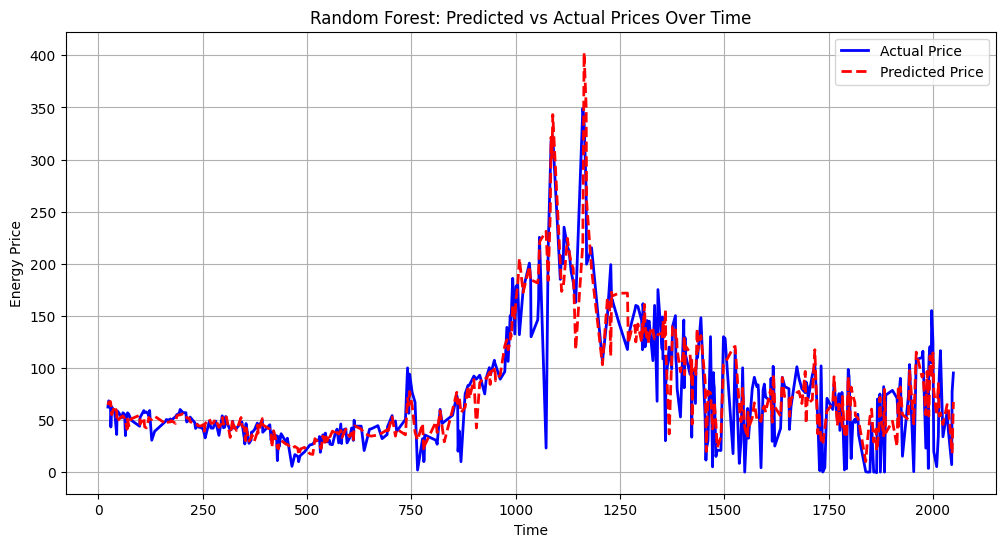

In [132]:
# Assuming X_test has a DateTime index or a corresponding time column
time_series = X_test_0313_randomforest.index if isinstance(X_test_0313_randomforest, pd.DataFrame) else range(len(y_test_0313_randomforest))

# Sort values by time (just in case)
sorted_indices = np.argsort(time_series)
time_series_sorted = np.array(time_series)[sorted_indices]
y_test_sorted = np.array(y_test_0313_randomforest)[sorted_indices]
y_pred_sorted = np.array(y_pred_0313_randomforest)[sorted_indices]

# Plot actual vs predicted over time
plt.figure(figsize=(12, 6))
plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_sorted, label="Predicted Price", color="red", linestyle="dashed", linewidth=2)
plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Random Forest: Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

# Random forest tiende a suavizar
# No es capaz de predecir el pico

# En mi caso es mas importante saber la tendencia



# crear un detector de picos en los datos ??
# error total y error sin picos


# menos honesto
# windsorizar los datos - meter todo entre el percentil 5 y el percentil 95


# Entrenar sin picos? suavizar sin picos

# problema de regresion lineal y train linea con outliers - usar para train o no?


# Expectation short fall of 95th percentile

# la media de los dias que está mal, cuanto nos la vamos a pegar

# rolling window de pandas y mirar como alinear

# SMA_180 o 182 - 30 dias? 

# SMA 3 4 7 esta bien, pero mas mejor 14 - 30 - 60 - 90 - 180 - 360

# esto depende del horizonte

## XGBoost

In [133]:
# Train XGBoost
xgb = XGBRegressor(n_estimators=100, learning_rate=0.1, random_state=42)
xgb.fit(X_train, y_train)

# Predictions
y_pred_xgb = xgb.predict(X_test)

# Evaluate
mse_xgb = mean_squared_error(y_test, y_pred_xgb)
r2_xgb = r2_score(y_test, y_pred_xgb)

print(f"XGBoost MSE: {mse_xgb:.4f}")
print(f"XGBoost R²: {r2_xgb:.4f}")

#! Pending on 95th, 99th percentile errors ???

XGBoost MSE: 1336.7446
XGBoost R²: 0.6955


## LightGBM

In [134]:
# Create LightGBM dataset
lgb_train = lgb.Dataset(X_train, y_train)
lgb_test = lgb.Dataset(X_test, y_test, reference=lgb_train)

# Define model parameters
params = {
    "objective": "regression",
    "metric": "rmse",
    "num_leaves": 31,
    "learning_rate": 0.1,
    "verbose": -1
}

# Train with early stopping using callbacks
lgbm = lgb.train(
    params,
    lgb_train,
    valid_sets=[lgb_test],
    callbacks=[lgb.early_stopping(10), lgb.log_evaluation(10)]  # Correct usage
)

# Make predictions
y_pred_lgb = lgbm.predict(X_test, num_iteration=lgbm.best_iteration)

# Evaluate performance
mse_lgb = mean_squared_error(y_test, y_pred_lgb)
print(f"LightGBM MSE: {mse_lgb:.4f}")

Training until validation scores don't improve for 10 rounds
[10]	valid_0's rmse: 39.0297
[20]	valid_0's rmse: 34.6235
[30]	valid_0's rmse: 34.2619
Early stopping, best iteration is:
[29]	valid_0's rmse: 34.2494
LightGBM MSE: 1173.0187


## XGBoost vs LightGBM performance

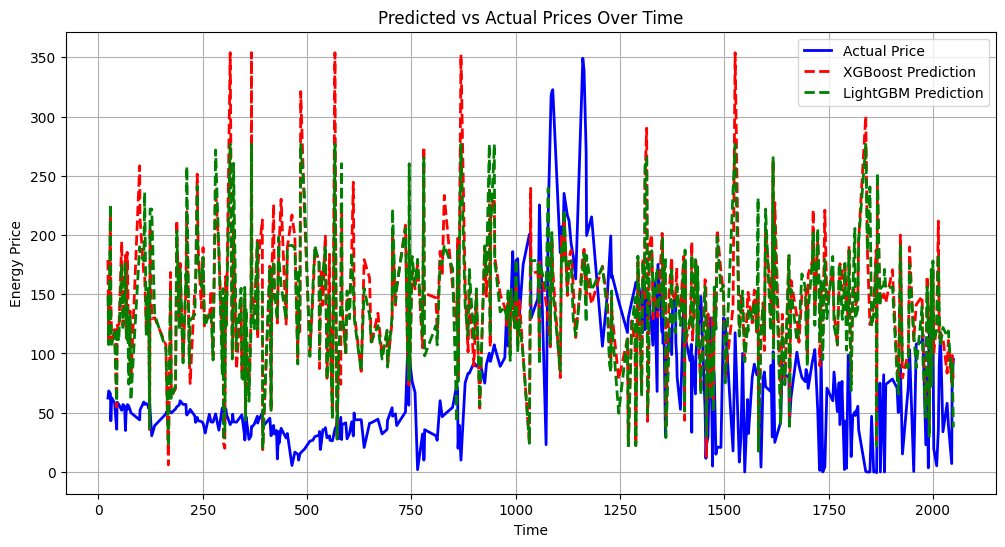

In [135]:
plt.figure(figsize=(12, 6))

plt.plot(time_series_sorted, y_test_sorted, label="Actual Price", color="blue", linewidth=2)
plt.plot(time_series_sorted, y_pred_xgb[sorted_indices], label="XGBoost Prediction", color="red", linestyle="dashed", linewidth=2)
plt.plot(time_series_sorted, y_pred_lgb[sorted_indices], label="LightGBM Prediction", color="green", linestyle="dashed", linewidth=2)

plt.xlabel("Time")
plt.ylabel("Energy Price")
plt.title("Predicted vs Actual Prices Over Time")
plt.legend()
plt.grid(True)
plt.show()

## Peak analysis

In [136]:
# Analyze how many peaks, how many outliers


## Change of approach to use Memory (a sliding window) for "mini" models

In [137]:
from utils import mini_models

In [138]:
# Read DB
csv_db_file = '../data/hour_14_metrics.csv'
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

____________ X_subset_to_trim
          0      1      2
0      2.30  48.02  52.00
1     48.02  52.00  48.19
2     52.00  48.19  52.02
3     48.19  52.02  52.07
4     52.02  52.07  54.07
...     ...    ...    ...
2625   7.10  77.32  77.87
2626  77.32  77.87  70.01
2627  77.87  70.01  95.12
2628  70.01  95.12  18.82
2629  95.12  18.82   0.00

[2630 rows x 3 columns]
____________ END X_subset_to_trim
____________ y_subset_to_trim
0       48.19
1       52.02
2       52.07
3       54.07
4       69.42
        ...  
2625    70.01
2626    95.12
2627    18.82
2628     0.00
2629    11.37
Length: 2630, dtype: float64
____________ END y_subset_to_trim
Actual vs Predicted:
      Actual    Predicted
0      48.19          NaN
1      52.02          NaN
2      52.07          NaN
3      54.07    51.902238
4      69.42    53.330152
...      ...          ...
2625   70.01    55.622843
2626   95.12    69.015961
2627   18.82    95.374644
2628    0.00   251.474146
2629   11.37  1554.216267

[2630 rows x 2 col

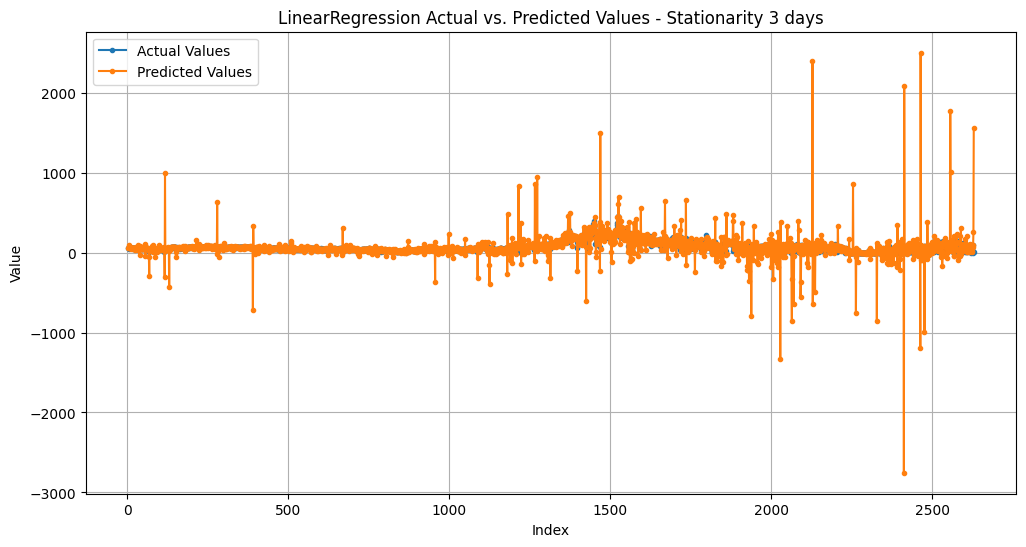

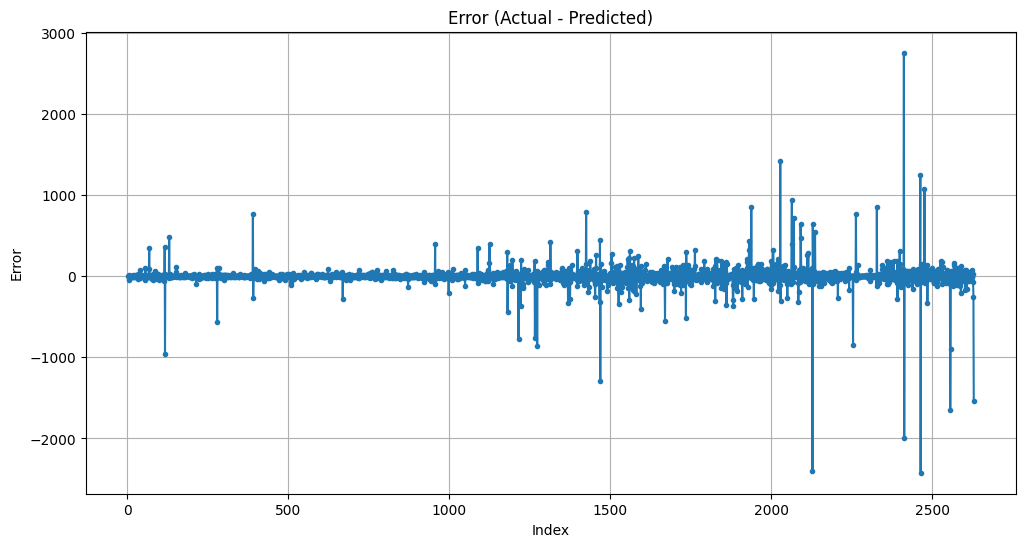

In [250]:
### Short Stationarity (3 rowss)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# STEPS
# For loop - as many rows as available in y_subset_to_trim
    # Make subsets of however many rows as stationarity_depth indicates
    
    # Train mini model with subset
    # Predict with the next row of the subset with that model
    
    # Save the predicted value to a y_pred series

# Compare y_subset_to_trim with y_pred in the available indexes

y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')  # Initialize y_pred with same index as y_subset_to_trim

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Training the mini model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted value
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# Calculating the error
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

____________ X_subset_to_trim
          0      1      2
0      2.30  48.02  52.00
1     48.02  52.00  48.19
2     52.00  48.19  52.02
3     48.19  52.02  52.07
4     52.02  52.07  54.07
...     ...    ...    ...
2625   7.10  77.32  77.87
2626  77.32  77.87  70.01
2627  77.87  70.01  95.12
2628  70.01  95.12  18.82
2629  95.12  18.82   0.00

[2630 rows x 3 columns]
____________ END X_subset_to_trim
____________ y_subset_to_trim
0       48.19
1       52.02
2       52.07
3       54.07
4       69.42
        ...  
2625    70.01
2626    95.12
2627    18.82
2628     0.00
2629    11.37
Length: 2630, dtype: float64
____________ END y_subset_to_trim
Actual vs Predicted:
      Actual  Predicted
0      48.19        NaN
1      52.02        NaN
2      52.07        NaN
3      54.07        NaN
4      69.42        NaN
...      ...        ...
2625   70.01  60.773924
2626   95.12  64.058642
2627   18.82  82.409781
2628    0.00  26.379231
2629   11.37  21.522040

[2630 rows x 2 columns]

Error:
365      3

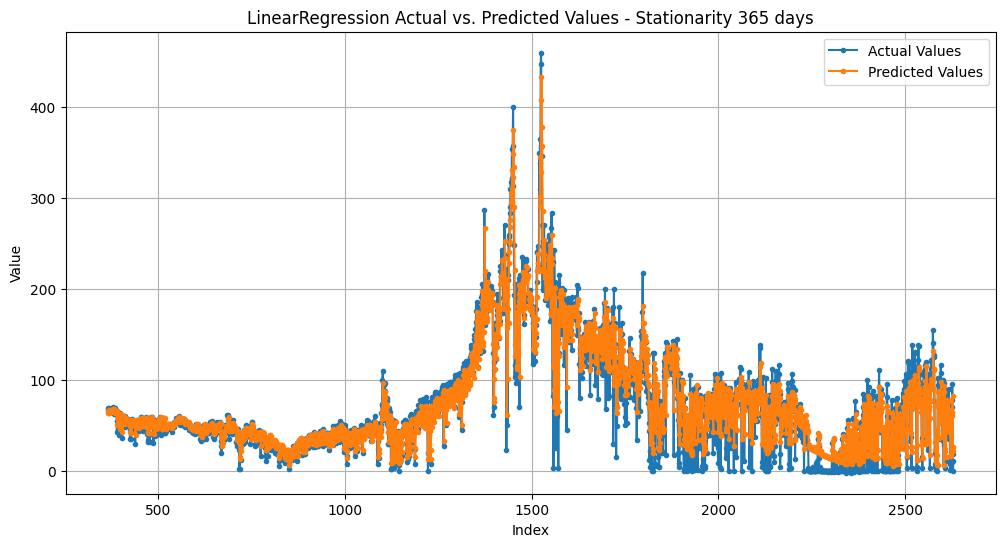

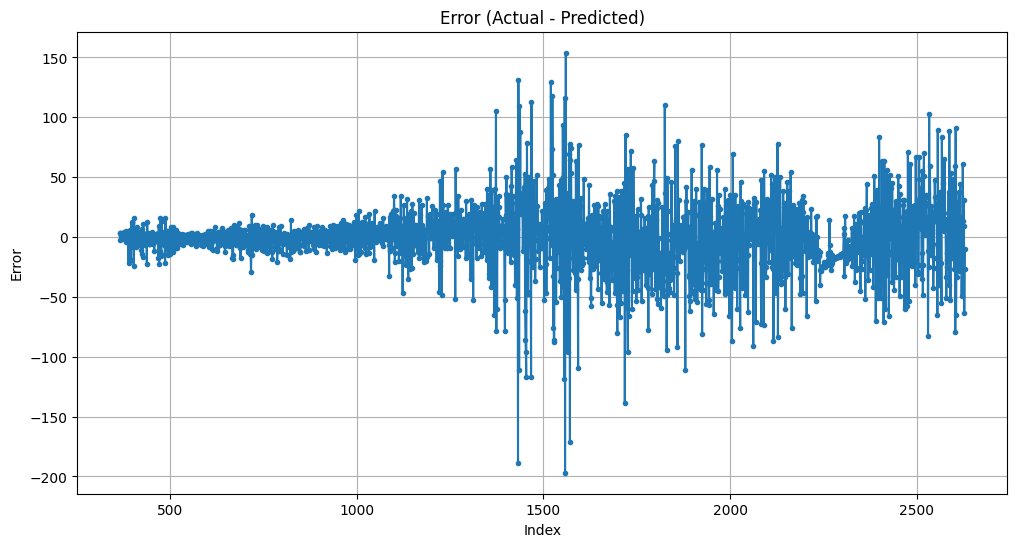

In [255]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 365 # * 4

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

print("____________ y_subset_to_trim")
print(y_subset_to_trim)
print("____________ END y_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now using more features:

In [ ]:
# def create_weight_matrix(data, window_size, target_col='MarginalES'):
#     """
#     Creates a feature matrix X with sliding windows of the target column and all other features,
#     and a corresponding target vector y containing the next price value.
    
#     Parameters:
#     - data: DataFrame with 'Datetime' and multiple feature columns
#     - window_size: Size of the sliding window
#     - target_col: Name of the column to predict (default: 'MarginalES')
    
#     Returns:
#     - X: DataFrame with sliding windows features
#     - y: Series with target values (next price after each window)
#     """
#     # Remove datetime column if it exists
#     if 'Datetime' in data.columns:
#         data = data.drop('Datetime', axis=1)
    
#     # Get the number of features (columns)
#     n_features = data.shape[1]
    
#     # Initialize empty lists
#     X_data = []
#     y_data = []
    
#     # For each possible window start position
#     for i in range(len(data) - window_size):
#         # Get the window of data
#         window = data.iloc[i:i+window_size]
        
#         # Flatten the window into a single row
#         row = window.values.flatten()
        
#         # Add to X
#         X_data.append(row)
        
#         # Get the target value (next value of target column after window)
#         y_data.append(data[target_col].iloc[i + window_size])
    
#     # Convert to DataFrame and Series
#     X_df = pd.DataFrame(X_data)
#     y_series = pd.Series(y_data)
    
#     return X_df, y_series

In [144]:
# Read DB w features
# csv_db_file = '../data/hour_14_metrics.csv'
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'
df_sw = pd.read_csv(csv_hour_file, parse_dates=['Datetime'])
df_sw = df_sw[['Datetime', 'MarginalES']]

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [145]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")

# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = LinearRegression()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

____________ X_subset_to_trim
          0      1      2
0     66.58  67.20  68.12
1     67.20  68.12  64.64
2     68.12  64.64  57.39
3     64.64  57.39  63.91
4     57.39  63.91  65.22
...     ...    ...    ...
2049  77.32  77.87  70.01
2050  77.87  70.01  95.12
2051  70.01  95.12  18.82
2052  95.12  18.82   0.00
2053  18.82   0.00  11.37

[2054 rows x 3 columns]
____________ END X_subset_to_trim
Actual vs Predicted:
      Actual    Predicted
0      64.64          NaN
1      57.39          NaN
2      63.91          NaN
3      65.22    81.292625
4      65.88    49.405069
...      ...          ...
2049   95.12    69.015961
2050   18.82    95.374644
2051    0.00   251.474146
2052   11.37  1554.216267
2053   50.24    12.431810

[2054 rows x 2 columns]

Error:
3        -16.072625
4         16.474931
5         -2.148286
6          3.944840
7          8.033840
           ...     
2049      26.104039
2050     -76.554644
2051    -251.474146
2052   -1542.846267
2053      37.808190
Length: 2051,

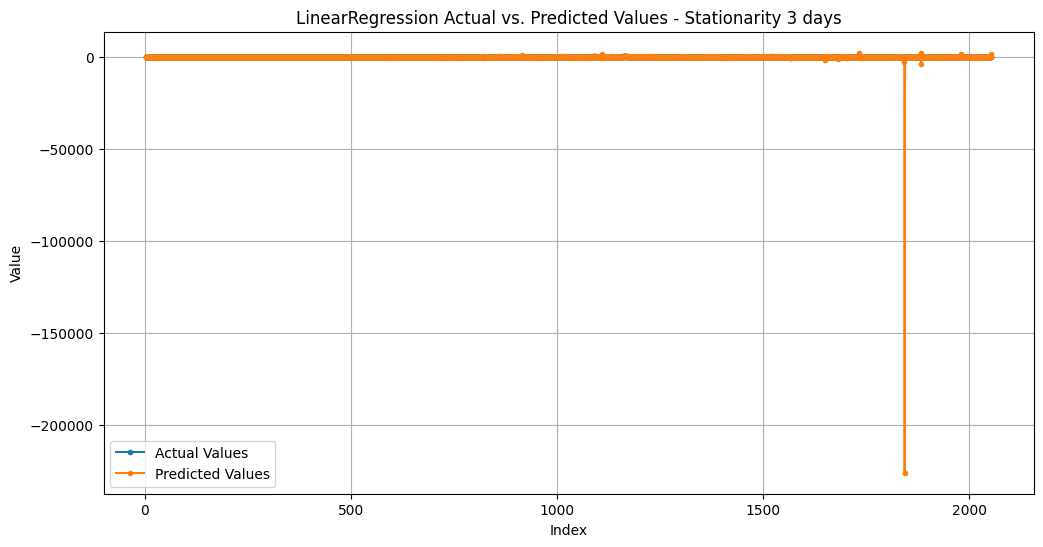

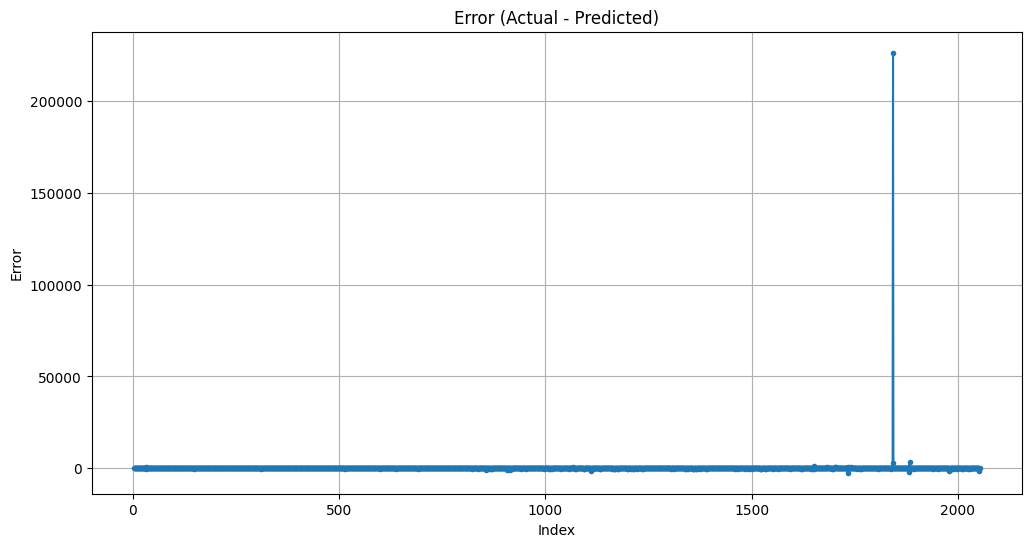

In [146]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

Now changing to Lasso for different weights

____________ X_subset_to_trim
          0      1      2
0     66.58  67.20  68.12
1     67.20  68.12  64.64
2     68.12  64.64  57.39
3     64.64  57.39  63.91
4     57.39  63.91  65.22
...     ...    ...    ...
2048   7.10  77.32  77.87
2049  77.32  77.87  70.01
2050  77.87  70.01  95.12
2051  70.01  95.12  18.82
2052  95.12  18.82   0.00

[2053 rows x 3 columns]
____________ END X_subset_to_trim


/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 3.152e-01, tolerance: 2.826e-01
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.847e-02, tolerance: 1.889e-02
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent

Actual vs Predicted:
      Actual   Predicted
0      64.64         NaN
1      57.39         NaN
2      63.91         NaN
3      65.22   81.256907
4      65.88   60.334054
...      ...         ...
2048   70.01   69.574986
2049   95.12   69.874175
2050   18.82   96.378003
2051    0.00  249.900035
2052   11.37  841.287169

[2053 rows x 2 columns]

Error:
3       -16.036907
4         5.545946
5        -2.039324
6         3.089370
7         4.796378
           ...    
2048      0.435014
2049     25.245825
2050    -77.558003
2051   -249.900035
2052   -829.917169
Length: 2050, dtype: float64


/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.056e+00, tolerance: 1.280e-01
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 7.168e-02, tolerance: 1.849e-02
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent

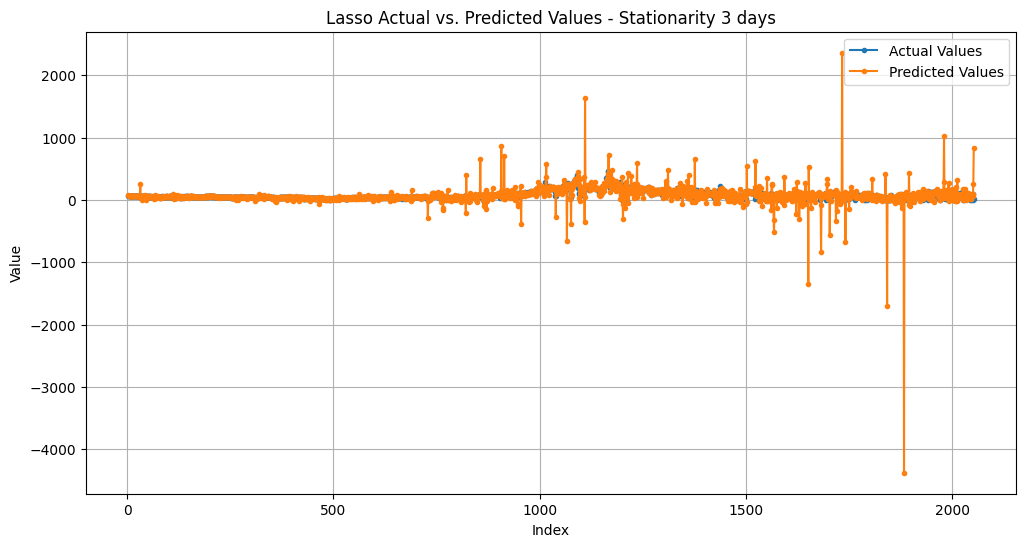

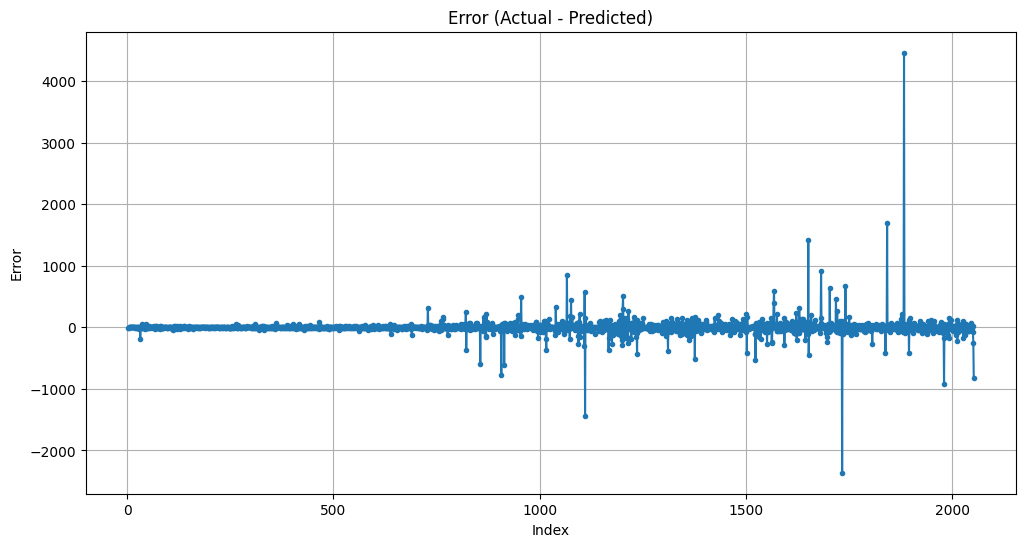

In [257]:
###  Long Stationarity supposition (lots of rows)
stationarity_depth = 3

window_size = 3

# Create sliding window weight matrix
X_subset_to_trim, y_subset_to_trim = create_weight_matrix(subset_df_features, window_size)

print("____________ X_subset_to_trim")
print(X_subset_to_trim)
print("____________ END X_subset_to_trim")


# Initialize y_pred with same index as y_subset_to_trim
y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
    # Make subsets for training of the specified depth
    X_train = X_subset_to_trim.iloc[i:i + stationarity_depth]
    y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

    # Train the model
    model = Lasso()
    model.fit(X_train, y_train)

    # Predict the NEXT point after the training window
    # X_predict = X_subset_to_trim.iloc[i + stationarity_depth].values.reshape(1, -1)
    X_predict = X_subset_to_trim.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
    y_predict = model.predict(X_predict)[0]

    # Save the predicted variable
    y_pred.iloc[i + stationarity_depth] = y_predict

# Compare y_subset_to_trim with y_pred in the available indexes
print("Actual vs Predicted:")
print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

#calculate error.
valid_pred = y_pred.dropna()
valid_actual = y_subset_to_trim[valid_pred.index]
error = valid_actual - valid_pred
print("\nError:")
print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

# Corrected the procedure

In [238]:
# Read DB w features
csv_db_file = '../data/ta_metrics/0401_price_metrics_hour_14.csv'

# Read all columns from the CSV file
df_sw = pd.read_csv(csv_db_file, parse_dates=['Datetime'])

# Date range
start_date = '2018-01-01'
end_date = '2025-03-18'

# Filter by date range but keep all columns
subset_df_features = df_sw[(df_sw['Datetime'] >= start_date) & (df_sw['Datetime'] <= end_date)]

In [205]:
# # DEBUG
# # def create_weight_matrix_with_features(data, window_size):
# #     """
# #     Creates a weight matrix where each row is a sliding window of prices,
# #     along with technical indicators as features, and a target vector with the next price.
    
# #     Parameters:
# #     - data: DataFrame with 'Datetime', 'MarginalES', and technical indicators
# #     - window_size: Size of the sliding window
    
# #     Returns:
# #     - X: DataFrame with sliding windows and features as columns
# #     - y: Series with target values (next price after each window)
# #     """
# #     # Print columns to verify indicators are present
# #     print("Columns in the input data:", data.columns.tolist())
    
# #     # Extract the MarginalES column (price data)
# #     if 'MarginalES' in data.columns:
# #         prices = data['MarginalES'].values
# #     else:
# #         # Assume it's the second column (index 1)
# #         prices = data.iloc[:, 1].values
    
# #     # Number of samples we'll have after creating windows
# #     n_samples = len(prices) - window_size - 1
    
# #     # Create matrices for windows and target
# #     X_windows = np.zeros((n_samples, window_size))
# #     y = np.zeros(n_samples)
    
# #     # Fill the matrices with the sliding windows and targets
# #     for i in range(n_samples):
# #         X_windows[i, :] = prices[i:i+window_size]  # Window of prices
# #         y[i] = prices[i+window_size]  # Next price after window
    
# #     # Convert window matrix to DataFrame
# #     X_df = pd.DataFrame(X_windows, columns=[f'price_t-{window_size-i}' for i in range(window_size)])
    
# #     # Extract features from the data, excluding Datetime and MarginalES columns
# #     feature_cols = [col for col in data.columns if col not in ['Datetime', 'MarginalES']]
# #     print("Feature columns identified:", feature_cols)
    
# #     # For each sample i, we want features from position i+window_size
# #     features = data[feature_cols].iloc[window_size:window_size+n_samples].reset_index(drop=True)
    
# #     print("Features DataFrame shape:", features.shape)
# #     print("X_df shape:", X_df.shape)
    
# #     # Combine the window matrix with the features
# #     X_combined = pd.concat([X_df, features], axis=1)
    
# #     print("X_combined shape after concatenation:", X_combined.shape)
# #     print("X_combined columns:", X_combined.columns.tolist())
    
# #     return X_combined, pd.Series(y)


# def create_weight_matrix_with_features(data, window_size):
#     """
#     Creates a weight matrix where each row is a sliding window of prices,
#     along with technical indicators as features, and a target vector with the next price.
    
#     Parameters:
#     - data: DataFrame with 'Datetime', 'MarginalES', and technical indicators
#     - window_size: Size of the sliding window
    
#     Returns:
#     - X: DataFrame with sliding windows and features as columns
#     - y: Series with target values (next price after each window)
#     """
#     # Extract the MarginalES column (price data)
#     if 'MarginalES' in data.columns:
#         prices = data['MarginalES'].values
#     else:
#         # If not, assume it's the second column (index 1)
#         prices = data.iloc[:, 1].values
    
#     # Number of samples we'll have after creating windows
#     n_samples = len(prices) - window_size - 1
    
#     # Create matrices for windows and target
#     X_windows = np.zeros((n_samples, window_size))
#     y = np.zeros(n_samples)
    
#     # Fill the matrices with the sliding windows and targets
#     for i in range(n_samples):
#         X_windows[i, :] = prices[i:i+window_size]  # Window of prices
#         y[i] = prices[i+window_size]  # Next price after window
    
#     # Convert window matrix to DataFrame
#     X_df = pd.DataFrame(X_windows, columns=[f'price_t-{window_size-i}' for i in range(window_size)])
    
#     # Extract features from the data, excluding Datetime and MarginalES columns
#     feature_cols = [col for col in data.columns if col not in ['Datetime', 'MarginalES']]
#     # DEBUG
#     # print("Feature columns identified:", feature_cols)
    
#     # For each sample i, the features should correspond to the window [i:i+window_size-1]
#     # So for the first window positions 0,1,2, we want features from position 2 (window_size-1)
#     # That means for all samples, we want features from position i+window_size-1
#     features_idx = range(window_size-1, window_size-1+n_samples)
#     features = data[feature_cols].iloc[features_idx].reset_index(drop=True)
    
#     # DEBUG
#     print("Features DataFrame shape:", features.shape)
#     print("X_df shape:", X_df.shape)
    
#     # Combine the window matrix with the features
#     X_combined = pd.concat([X_df, features], axis=1)
    
#     # DEBUG
#     print("X_combined shape after concatenation:", X_combined.shape)
#     print("X_combined columns:", X_combined.columns.tolist())
    
#     return X_combined, pd.Series(y)

____________ X_combined
      price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
0         66.58      67.20      68.12  67.300000  66.910  66.107143   
1         67.20      68.12      64.64  66.653333  66.636  66.312857   
2         68.12      64.64      57.39  63.383333  64.786  65.225714   
3         64.64      57.39      63.91  61.980000  64.252  64.925714   
4         57.39      63.91      65.22  62.173333  63.856  64.722857   
...         ...        ...        ...        ...     ...        ...   
2048       7.10      77.32      77.87  54.096667  34.222  38.041429   
2049      77.32      77.87      70.01  75.066667  46.660  43.015714   
2050      77.87      70.01      95.12  81.000000  65.484  48.034286   
2051      70.01      95.12      18.82  61.316667  67.828  49.605714   
2052      95.12      18.82       0.00  37.980000  52.364  49.462857   

         SMA_14     SMA_30     SMA_60     SMA_90  ...     EMA_30        ROC_3  \
0     65.175000  65.195000  65.007167  65.

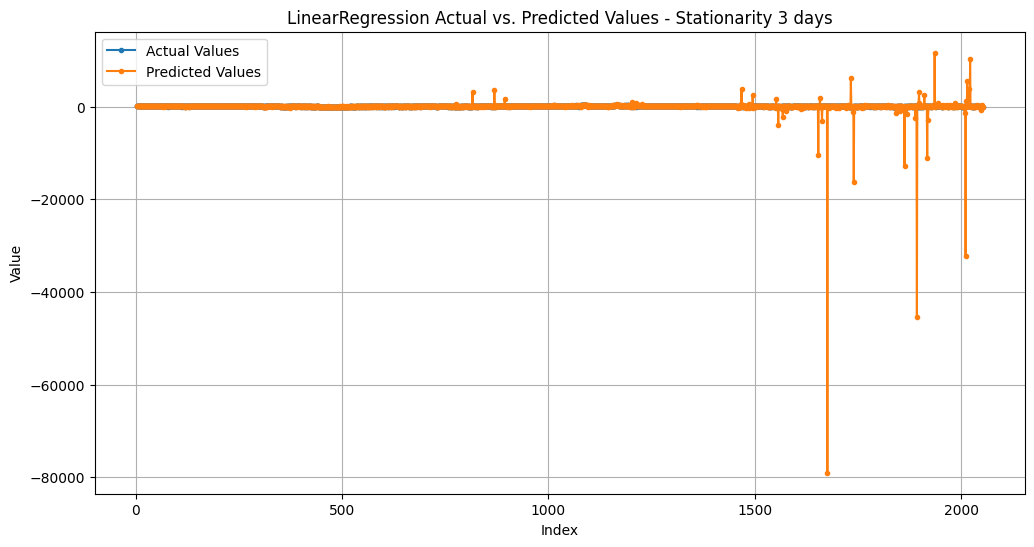

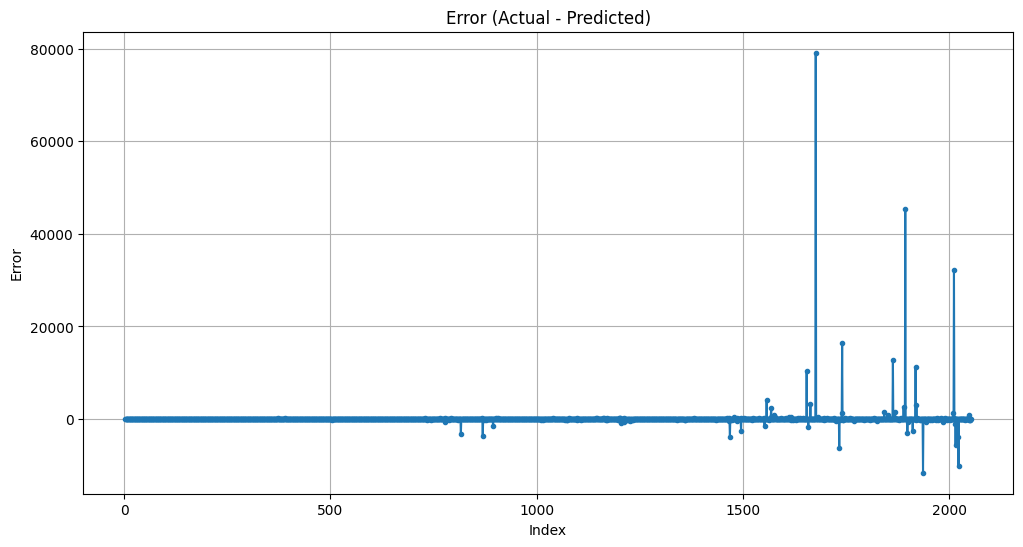

In [258]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = LinearRegression()

valid_pred, valid_actual, error = mini_model(model, subset_df_features, window_size, stationarity_depth)

# # Create sliding window weight matrix
# X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)

# print("____________ X_combined")
# print(X_combined)
# print("____________ END X_combined")

# # Initialize y_pred with same index as y_subset_to_trim
# y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

# for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
#     # Make subsets for training of the specified depth
#     X_train = X_combined.iloc[i:i + stationarity_depth]
#     y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

#     # Train the model
#     model = LinearRegression()
#     model.fit(X_train, y_train)

#     # Predict the NEXT point after the training window
#     X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1)
#     y_predict = model.predict(X_predict)[0]

#     # Save the predicted variable
#     y_pred.iloc[i + stationarity_depth] = y_predict

# # Compare y_subset_to_trim with y_pred in the available indexes
# print("Actual vs Predicted:")
# print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# #calculate error.
# valid_pred = y_pred.dropna()
# valid_actual = y_subset_to_trim[valid_pred.index]
# error = valid_actual - valid_pred
# print("\nError:")
# print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

____________ X_combined
      price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
0         66.58      67.20      68.12  67.300000  66.910  66.107143   
1         67.20      68.12      64.64  66.653333  66.636  66.312857   
2         68.12      64.64      57.39  63.383333  64.786  65.225714   
3         64.64      57.39      63.91  61.980000  64.252  64.925714   
4         57.39      63.91      65.22  62.173333  63.856  64.722857   
...         ...        ...        ...        ...     ...        ...   
2048       7.10      77.32      77.87  54.096667  34.222  38.041429   
2049      77.32      77.87      70.01  75.066667  46.660  43.015714   
2050      77.87      70.01      95.12  81.000000  65.484  48.034286   
2051      70.01      95.12      18.82  61.316667  67.828  49.605714   
2052      95.12      18.82       0.00  37.980000  52.364  49.462857   

         SMA_14     SMA_30     SMA_60     SMA_90  ...     EMA_30        ROC_3  \
0     65.175000  65.195000  65.007167  65.

/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 4.788e-02, tolerance: 2.108e-02
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent.py:695: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations, check the scale of the features or consider increasing regularisation. Duality gap: 1.196e-01, tolerance: 1.103e-02
  model = cd_fast.enet_coordinate_descent(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/linear_model/_coordinate_descent

Actual vs Predicted:
      Actual   Predicted
0      64.64         NaN
1      57.39         NaN
2      63.91         NaN
3      65.22   64.747922
4      65.88   59.192307
...      ...         ...
2048   70.01  -14.273401
2049   95.12   82.949894
2050   18.82  315.706449
2051    0.00  105.558712
2052   11.37   -2.631344

[2053 rows x 2 columns]

Error:
3         0.472078
4         6.687693
5        -2.583058
6         1.197859
7         3.449700
           ...    
2048     84.283401
2049     12.170106
2050   -296.886449
2051   -105.558712
2052     14.001344
Length: 2050, dtype: float64


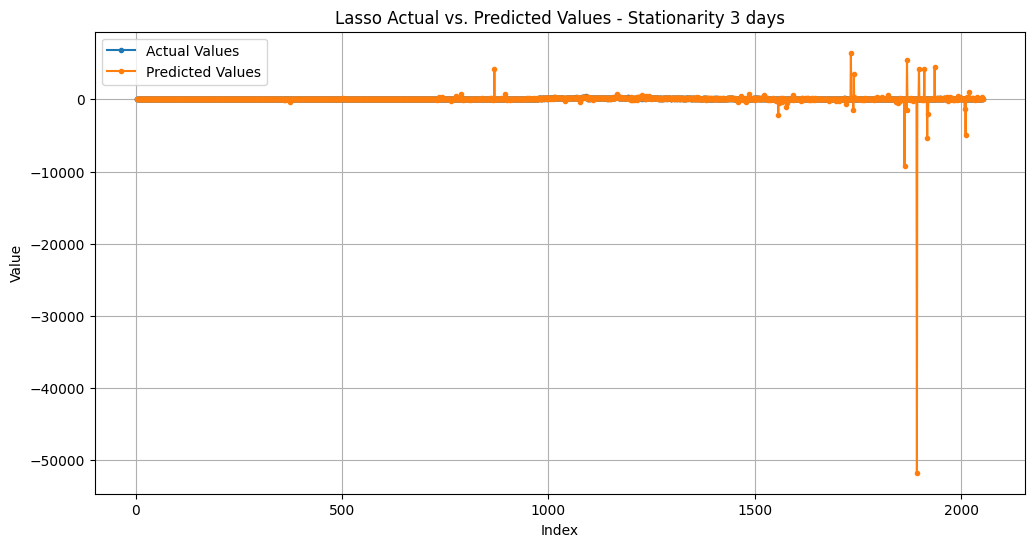

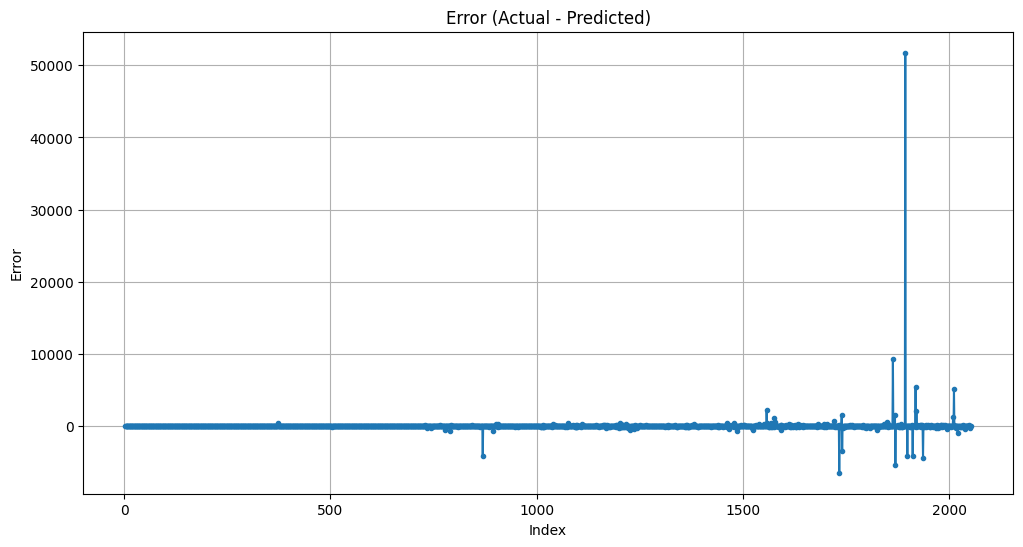

In [259]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

from utils.mini_models import mini_model

model = Lasso()

valid_pred, valid_actual, error = mini_model(model, subset_df_features, window_size, stationarity_depth)

# # Create sliding window weight matrix
# X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)

# print("____________ X_combined")
# print(X_combined)
# print("____________ END X_combined")

# # Initialize y_pred with same index as y_subset_to_trim
# y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

# for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
#     # Make subsets for training of the specified depth
#     X_train = X_combined.iloc[i:i + stationarity_depth]
#     y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

#     # Train the model
#     model = Lasso()
#     model.fit(X_train, y_train)

#     # Predict the NEXT point after the training window
#     X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1)
#     y_predict = model.predict(X_predict)[0]

#     # Save the predicted variable
#     y_pred.iloc[i + stationarity_depth] = y_predict

# # Compare y_subset_to_trim with y_pred in the available indexes
# print("Actual vs Predicted:")
# print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# #calculate error.
# valid_pred = y_pred.dropna()
# valid_actual = y_subset_to_trim[valid_pred.index]
# error = valid_actual - valid_pred
# print("\nError:")
# print(error)

plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

In [210]:
###  Short Stationarity Depth
stationarity_depth = 3

window_size = 3

model = RandomForestRegressor()

valid_pred, valid_actual, error = mini_model(model, subset_df_features, window_size, stationarity_depth)

# # Create sliding window weight matrix
# X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)

# print("____________ X_combined")
# print(X_combined)
# print("____________ END X_combined")

# # Initialize y_pred with same index as y_subset_to_trim
# y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')

# for i in range(y_subset_to_trim.size - stationarity_depth): # to avoid going out of bounds
#     # Make subsets for training of the specified depth
#     X_train = X_combined.iloc[i:i + stationarity_depth]
#     y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]

#     # Train the model
#     model = RandomForestRegressor()
#     model.fit(X_train, y_train)

#     # Predict the NEXT point after the training window
#     X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1)
#     y_predict = model.predict(X_predict)[0]

#     # Save the predicted variable
#     y_pred.iloc[i + stationarity_depth] = y_predict

# # Compare y_subset_to_trim with y_pred in the available indexes
# print("Actual vs Predicted:")
# print(pd.DataFrame({'Actual': y_subset_to_trim, 'Predicted': y_pred}))

# #calculate error.
# valid_pred = y_pred.dropna()
# valid_actual = y_subset_to_trim[valid_pred.index]
# error = valid_actual - valid_pred
# print("\nError:")
# print(error)

____________ X_combined
      price_t-3  price_t-2  price_t-1      SMA_3   SMA_5      SMA_7  \
0         66.58      67.20      68.12  67.300000  66.910  66.107143   
1         67.20      68.12      64.64  66.653333  66.636  66.312857   
2         68.12      64.64      57.39  63.383333  64.786  65.225714   
3         64.64      57.39      63.91  61.980000  64.252  64.925714   
4         57.39      63.91      65.22  62.173333  63.856  64.722857   
...         ...        ...        ...        ...     ...        ...   
2048       7.10      77.32      77.87  54.096667  34.222  38.041429   
2049      77.32      77.87      70.01  75.066667  46.660  43.015714   
2050      77.87      70.01      95.12  81.000000  65.484  48.034286   
2051      70.01      95.12      18.82  61.316667  67.828  49.605714   
2052      95.12      18.82       0.00  37.980000  52.364  49.462857   

         SMA_14     SMA_30     SMA_60     SMA_90  ...     EMA_30        ROC_3  \
0     65.175000  65.195000  65.007167  65.

/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feat

Actual vs Predicted:
      Actual  Predicted
0      64.64        NaN
1      57.39        NaN
2      63.91        NaN
3      65.22    61.0714
4      65.88    63.3789
...      ...        ...
2048   70.01    66.3983
2049   95.12    72.9308
2050   18.82    84.7484
2051    0.00    65.4309
2052   11.37    37.6308

[2053 rows x 2 columns]

Error:
3        4.1486
4        2.5011
5       -2.2070
6        1.6510
7        4.1648
         ...   
2048     3.6117
2049    22.1892
2050   -65.9284
2051   -65.4309
2052   -26.2608
Length: 2050, dtype: float64


/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(
/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/.tfg_venv/lib/python3.13/site-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  warnings.warn(


In [211]:
# # Package import Cache clear

# import sys
# sys.path.append('/Users/rodrigodelama/Library/Mobile Documents/com~apple~CloudDocs/uc3m/TFG/code')

# import importlib
# import utils.basic_plots
# importlib.reload(utils.basic_plots)

# # Proper import
# from utils.basic_plots import plot_actual_vs_pred, plot_error

# try:
#     print(type(valid_actual), type(valid_pred))
#     print(valid_actual.index[:5], valid_pred.index[:5])
#     plot_actual_vs_pred(valid_actual, valid_pred, stationarity_depth)
# except Exception as e:
#     print(f"Failed to plot: {e}")

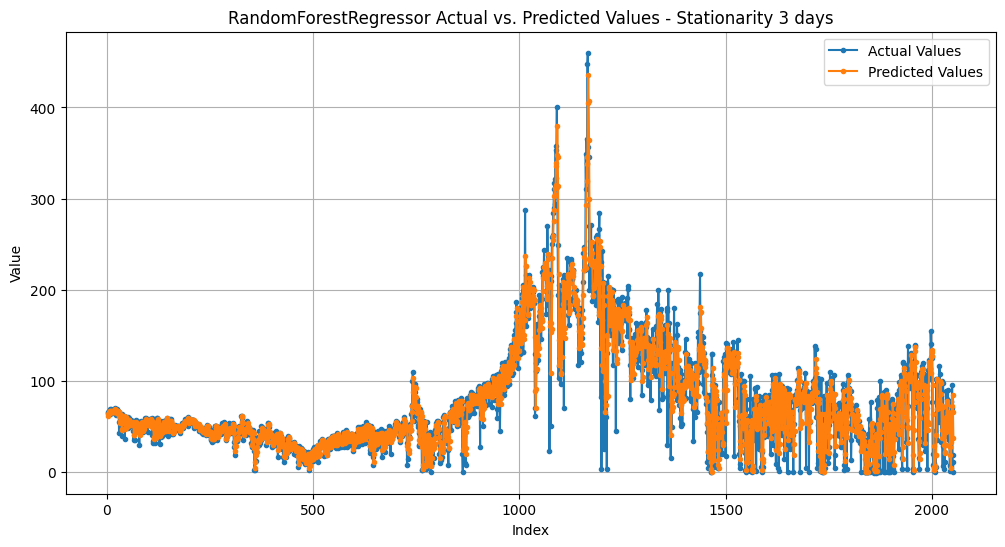

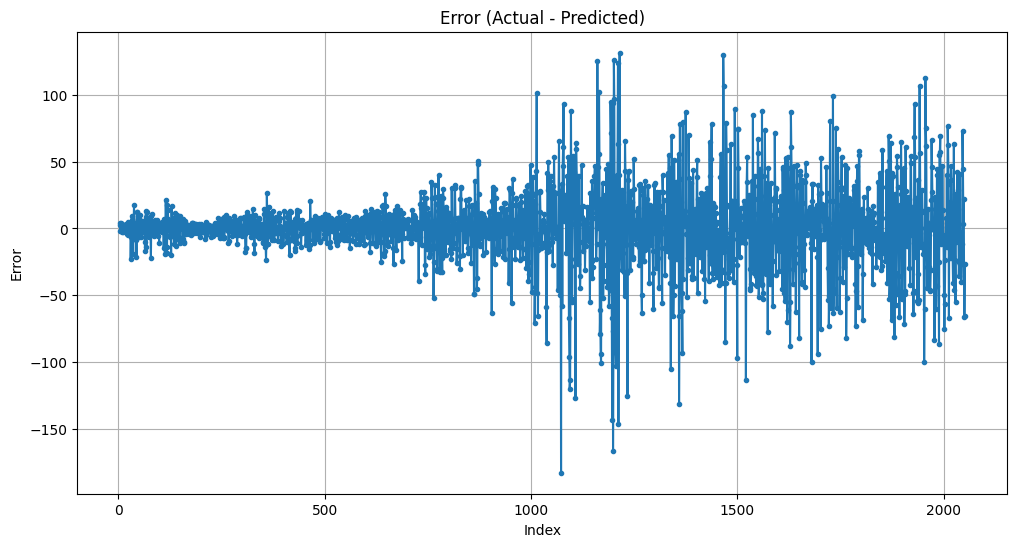

In [212]:
plot_actual_vs_predicted(model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

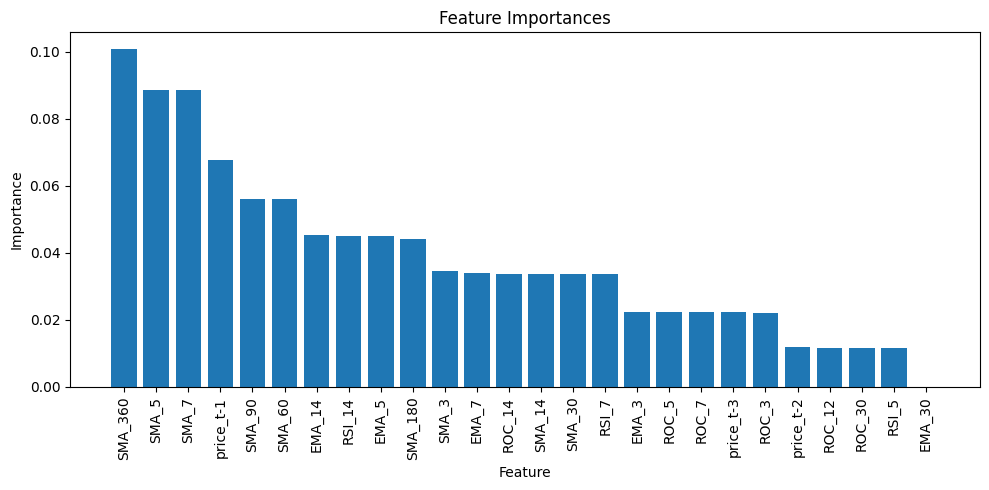

In [213]:
# Most relevant features of the Random Forest
# Get feature importance
plot_feature_importance(model, X_combined)

# feature_importance = model.feature_importances_
# # Sort and plot
# indices = np.argsort(feature_importance)[::-1]
# plt.figure(figsize=(10, 5))
# plt.title("Feature Importances")
# # Feature names
# feature_names = X_combined.columns.tolist()
# # Sort feature names according to importance
# sorted_feature_names = [feature_names[i] for i in indices]
# plt.bar(range(X_combined.shape[1]), feature_importance[indices], align="center")
# plt.xticks(range(X_combined.shape[1]), sorted_feature_names, rotation=90)
# plt.xlabel("Feature")
# plt.ylabel("Importance")
# plt.tight_layout()
# plt.show()

## Deep Random Forest

In [ ]:
from sklearn.ensemble import RandomForestRegressor

# Initialize the most complex RF model possible
complex_rf = RandomForestRegressor(
    n_estimators=500,          # Large number of trees
    max_depth=None,            # Unlimited depth
    min_samples_split=2,       # Minimum to continue splitting
    min_samples_leaf=1,        # Allow leaf nodes with just 1 sample
    max_features='sqrt',       # Consider sqrt(n_features) features per split
    bootstrap=True,            # Use bootstrap samples
    random_state=42,           # For reproducibility
    n_jobs=-1                  # Use all available cores
)

In [234]:
def optimized_rf_model(subset_df_features, window_size, stationarity_depth):
    """
    Create an optimized Random Forest model using grid search and cross-validation
    with a sliding window approach for time series data.
    """
    from sklearn.model_selection import TimeSeriesSplit, GridSearchCV
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    
    # Create feature matrix
    X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
    
    # Define parameter grid from most complex to simpler
    param_grid = {
        'n_estimators': [500, 250, 100, 50],
        'max_depth': [None, 30, 20, 10],
        'min_samples_split': [2, 5, 10],
        'min_samples_leaf': [1, 2, 4]
    }
    
    # Time series cross-validation
    tscv = TimeSeriesSplit(n_splits=5)
    
    # Initialize base model
    base_rf = RandomForestRegressor(random_state=42, n_jobs=-1)
    
    # Grid search with time series cross-validation
    grid_search = GridSearchCV(
        estimator=base_rf,
        param_grid=param_grid,
        cv=tscv,
        scoring='neg_mean_squared_error',
        verbose=1,
        n_jobs=-1
    )
    
    # Find optimal parameters using the full dataset
    grid_search.fit(X_combined, y_subset_to_trim)
    
    print(f"Best parameters: {grid_search.best_params_}")
    print(f"Best score: {-grid_search.best_score_}")
    
    # Get the optimized model
    optimized_model = grid_search.best_estimator_
    
    # Now use the optimized model with the original sliding window approach
    y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
    
    for i in range(y_subset_to_trim.size - stationarity_depth):
        # Make subsets for training of the specified depth
        X_train = X_combined.iloc[i:i + stationarity_depth]
        y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
        
        # Train model on the current window
        optimized_model.fit(X_train, y_train)
        
        # Predict the NEXT point after the training window
        # Use Pandas instead of NumPy
        # X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1) 
        X_predict = X_combined.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names - useful for feature importance
        y_predict = optimized_model.predict(X_predict)[0]
        
        # Save the predicted variable
        y_pred.iloc[i + stationarity_depth] = y_predict
    
    # Compare actual vs predicted
    valid_pred = y_pred.dropna()
    valid_actual = y_subset_to_trim[valid_pred.index]
    error = valid_actual - valid_pred
    
    # Calculate metrics
    mse = mean_squared_error(valid_actual, valid_pred)
    r2 = r2_score(valid_actual, valid_pred)
    
    print(f"\nModel Performance:")
    print(f"MSE: {mse:.6f}")
    print(f"R²: {r2:.6f}")
    print(f"RMSE: {np.sqrt(mse):.6f}")
    
    # Show feature importances
    feature_importance = pd.DataFrame({
        'Feature': X_combined.columns,
        'Importance': optimized_model.feature_importances_
    }).sort_values('Importance', ascending=False)
    
    print("\nTop 10 Important Features:")
    print(feature_importance.head(10))
    
    return valid_pred, valid_actual, error, optimized_model

In [235]:
valid_pred, valid_actual, error, optimized_model = optimized_rf_model(subset_df_features, window_size, stationarity_depth)

Fitting 5 folds for each of 144 candidates, totalling 720 fits
Best parameters: {'max_depth': None, 'min_samples_leaf': 4, 'min_samples_split': 10, 'n_estimators': 100}
Best score: 1566.3614754892055

Model Performance:
MSE: 878.018653
R²: 0.762849
RMSE: 29.631380

Top 10 Important Features:
      Feature  Importance
0   price_t-3         0.0
1   price_t-2         0.0
24      RSI_7         0.0
23      RSI_5         0.0
22     ROC_30         0.0
21     ROC_14         0.0
20     ROC_12         0.0
19      ROC_7         0.0
18      ROC_5         0.0
17      ROC_3         0.0


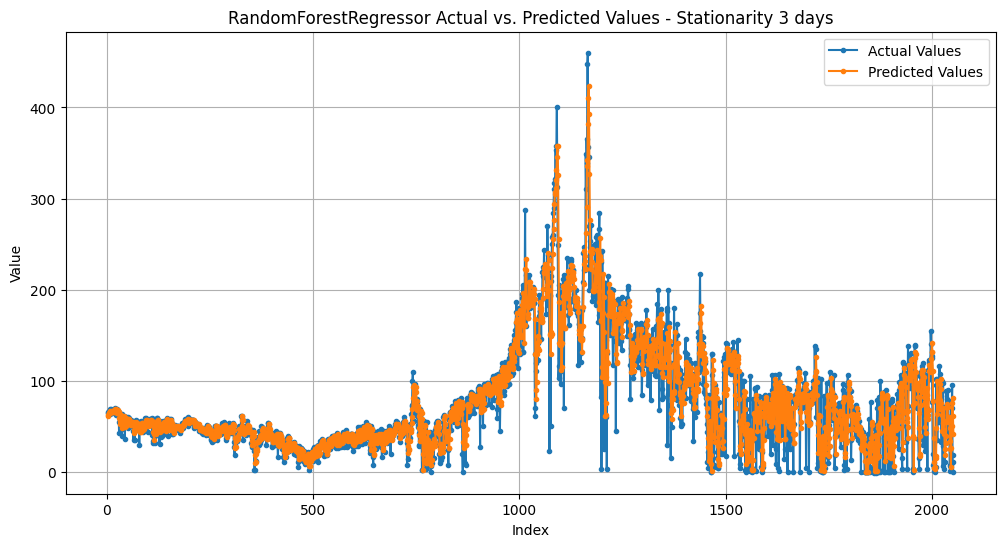

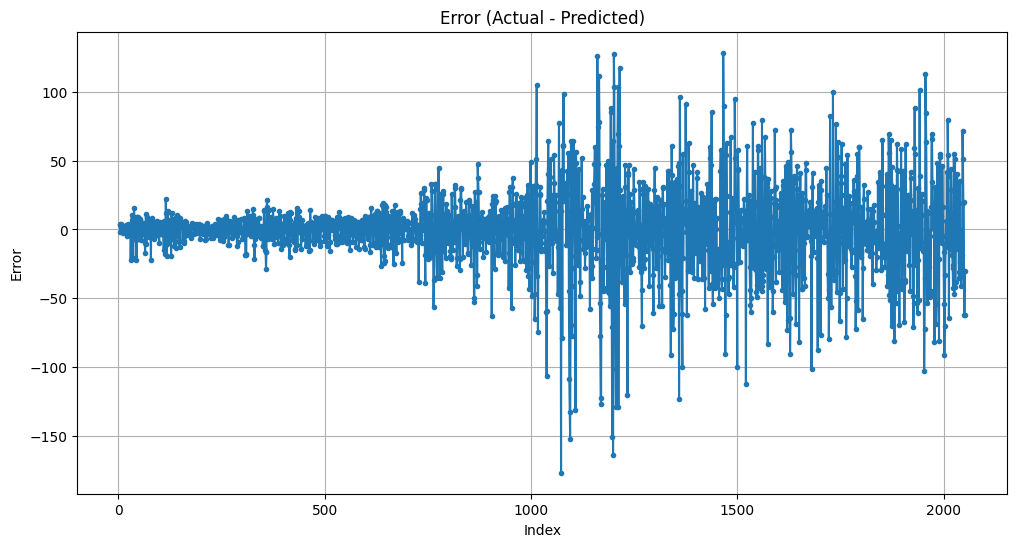

In [236]:
plot_actual_vs_predicted(optimized_model, valid_actual, valid_pred, stationarity_depth)
plot_error(error)

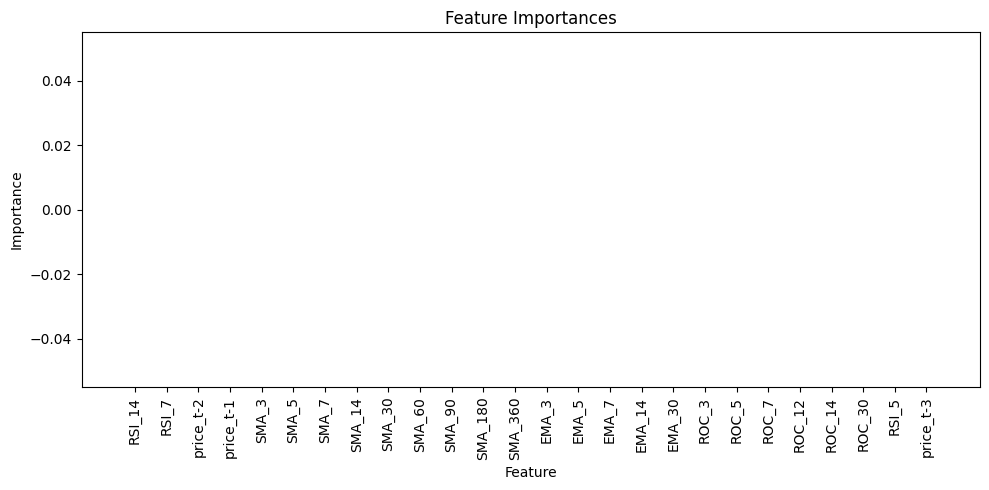

In [237]:
# Most relevant features of the Random Forest
# Get feature importance
X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
plot_feature_importance(optimized_model, X_combined)

In [222]:
# GitHub Copilot suggestions

# # Save the model
# import joblib
# model_path = '../models/optimized_rf_model.pkl'
# joblib.dump(optimized_model, model_path)
# print(f"Model saved to {model_path}")

# # Load the model
# loaded_model = joblib.load(model_path)
# print(f"Model loaded from {model_path}")
# # Check if the loaded model is the same as the original
# print(f"Are the models the same? {loaded_model == optimized_model}")
# # Check the loaded model's parameters
# print(f"Loaded model parameters: {loaded_model.get_params()}")
# # Check the loaded model's feature importances
# print(f"Loaded model feature importances: {loaded_model.feature_importances_}")
# # Check the loaded model's predictions
# y_pred_loaded = loaded_model.predict(X_combined)
# print(f"Loaded model predictions: {y_pred_loaded[:5]}")  # Print first 5 predictions
# # Check the loaded model's performance
# mse_loaded = mean_squared_error(valid_actual, y_pred_loaded)
# r2_loaded = r2_score(valid_actual, y_pred_loaded)
# print(f"Loaded model MSE: {mse_loaded:.6f}")
# print(f"Loaded model R²: {r2_loaded:.6f}")
# # Check the loaded model's RMSE
# rmse_loaded = np.sqrt(mse_loaded)
# print(f"Loaded model RMSE: {rmse_loaded:.6f}")
# # Check the loaded model's feature importances
# feature_importance_loaded = pd.DataFrame({
#     'Feature': X_combined.columns,
#     'Importance': loaded_model.feature_importances_
# }).sort_values('Importance', ascending=False)
# print("\nTop 10 Important Features from Loaded Model:")
# print(feature_importance_loaded.head(10))


In [227]:
# def optimize_rf_with_multiple_params(subset_df_features, window_sizes, stationarity_depths):
#     """
#     Create an optimized Random Forest model by testing multiple combinations of:
#     1. Window sizes (feature columns in the weight matrix)
#     2. Stationarity depths (rows in the sliding window)
#     3. Random Forest hyperparameters
    
#     Parameters:
#     - subset_df_features: DataFrame containing the features for the model
#     - window_sizes: List of window sizes to test
#     - stationarity_depths: List of stationarity depths to test
    
#     Returns:
#     - Best predictions, actual values, error, and optimized model
#     - Dictionary of optimal parameters
#     """
#     from sklearn.ensemble import RandomForestRegressor
#     from sklearn.metrics import mean_squared_error, r2_score
#     import numpy as np
#     import pandas as pd
#     import time
    
#     best_rmse = float('inf')
#     best_params = {}
#     best_predictions = None
#     best_actual = None
#     best_error = None
#     best_model = None
#     results_df = []  # Store all results for comparison
    
#     # Define RF complexity parameters to try (from most complex to simplest)
#     rf_params = [
#         {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
#         {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1},
#         {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
#         {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2},
#         {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}
#     ]
    
#     total_combinations = len(window_sizes) * len(stationarity_depths) * len(rf_params)
#     print(f"Testing {total_combinations} parameter combinations...")
    
#     start_time = time.time()
#     combination_count = 0
    
#     # Loop through all combinations
#     for window_size in window_sizes:
#         # Create feature matrix based on window size
#         X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
#         print(f"\nWindow size: {window_size}, X shape: {X_combined.shape}")
        
#         for stationarity_depth in stationarity_depths:
#             # Skip if stationarity_depth is larger than available data
#             if stationarity_depth >= len(y_subset_to_trim):
#                 print(f"Skipping stationarity_depth {stationarity_depth} - exceeds data length")
#                 continue
                
#             print(f"\nTesting stationarity_depth: {stationarity_depth}")
            
#             for rf_param in rf_params:
#                 combination_count += 1
#                 print(f"Combination {combination_count}/{total_combinations}: "
#                       f"window={window_size}, depth={stationarity_depth}, "
#                       f"trees={rf_param['n_estimators']}, max_depth={rf_param['max_depth']}")
                
#                 # Create model with current parameters
#                 model = RandomForestRegressor(
#                     n_estimators=rf_param['n_estimators'],
#                     max_depth=rf_param['max_depth'],
#                     min_samples_split=rf_param['min_samples_split'],
#                     min_samples_leaf=rf_param['min_samples_leaf'],
#                     random_state=42,
#                     n_jobs=-1
#                 )
                
#                 # Sliding window prediction approach
#                 y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
                
#                 for i in range(y_subset_to_trim.size - stationarity_depth):
#                     # Make subsets for training of the specified depth
#                     X_train = X_combined.iloc[i:i + stationarity_depth]
#                     y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
                    
#                     # Train model on the current window
#                     model.fit(X_train, y_train)
                    
#                     # Predict the NEXT point after the training window
#                     # X_predict = X_combined.iloc[i + stationarity_depth].values.reshape(1, -1)
#                     # y_predict = model.predict(X_predict)[0]
#                     X_predict = X_combined.iloc[[i + stationarity_depth]]  # Keep as DataFrame with column names
#                     y_predict = model.predict(X_predict)[0]
                    
#                     # Save the predicted variable
#                     y_pred.iloc[i + stationarity_depth] = y_predict
                
#                 # Evaluate performance
#                 valid_pred = y_pred.dropna()
#                 valid_actual = y_subset_to_trim[valid_pred.index]
#                 error = valid_actual - valid_pred
                
#                 mse = mean_squared_error(valid_actual, valid_pred)
#                 rmse = np.sqrt(mse)
#                 r2 = r2_score(valid_actual, valid_pred)
                
#                 # Store results
#                 result = {
#                     'window_size': window_size,
#                     'stationarity_depth': stationarity_depth,
#                     'n_estimators': rf_param['n_estimators'],
#                     'max_depth': rf_param['max_depth'],
#                     'min_samples_split': rf_param['min_samples_split'],
#                     'min_samples_leaf': rf_param['min_samples_leaf'],
#                     'mse': mse,
#                     'rmse': rmse,
#                     'r2': r2
#                 }
#                 results_df.append(result)
                
#                 print(f"  RMSE: {rmse:.6f}, R²: {r2:.6f}")
                
#                 # Save best parameters
#                 if rmse < best_rmse:
#                     best_rmse = rmse
#                     best_params = {
#                         'window_size': window_size,
#                         'stationarity_depth': stationarity_depth,
#                         'rf_params': rf_param
#                     }
#                     best_predictions = valid_pred
#                     best_actual = valid_actual
#                     best_error = error
#                     best_model = model
#                     print(f"  New best parameters found!")
    
#     # Convert results to DataFrame for easier analysis
#     results_df = pd.DataFrame(results_df)
    
#     # Sort results by RMSE
#     results_df = results_df.sort_values('rmse')
    
#     # Print overall results
#     print("\n" + "="*50)
#     print(f"Optimization completed in {(time.time() - start_time)/60:.2f} minutes")
#     print(f"Best parameters:")
#     print(f"  Window size: {best_params['window_size']}")
#     print(f"  Stationarity depth: {best_params['stationarity_depth']}")
#     print(f"  RF parameters: {best_params['rf_params']}")
#     print(f"  RMSE: {best_rmse:.6f}")
    
#     # Display top 5 best configurations
#     print("\nTop 5 configurations:")
#     print(results_df.head(5))
    
#     # Feature importance for best model
#     if best_model is not None:
#         feature_importance = pd.DataFrame({
#             'Feature': X_combined.columns,
#             'Importance': best_model.feature_importances_
#         }).sort_values('Importance', ascending=False)
        
#         print("\nTop 10 Important Features:")
#         print(feature_importance.head(10))
    
#     return best_predictions, best_actual, best_error, best_model, best_params, results_df



# Optimized code for maximum CPU usage
def optimize_rf_with_multiple_params(subset_df_features, window_sizes, stationarity_depths):
    """
    Create an optimized Random Forest model by testing multiple combinations of parameters
    with parallel processing for maximum CPU utilization.
    """
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    import pandas as pd
    import time
    from joblib import Parallel, delayed
    
    # Define RF complexity parameters to try (from most complex to simplest)
    rf_params = [
        {'n_estimators': 500, 'max_depth': None, 'min_samples_split': 2, 'min_samples_leaf': 1},
        {'n_estimators': 300, 'max_depth': 30, 'min_samples_split': 2, 'min_samples_leaf': 1},
        {'n_estimators': 200, 'max_depth': 20, 'min_samples_split': 5, 'min_samples_leaf': 2},
        {'n_estimators': 100, 'max_depth': 15, 'min_samples_split': 5, 'min_samples_leaf': 2},
        {'n_estimators': 50, 'max_depth': 10, 'min_samples_split': 10, 'min_samples_leaf': 4}
    ]
    
    total_combinations = len(window_sizes) * len(stationarity_depths) * len(rf_params)
    print(f"Testing {total_combinations} parameter combinations in parallel...")
    
    start_time = time.time()
    
    # Create a list to store all feature matrices for reuse
    feature_matrices = {}
    for window_size in window_sizes:
        X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
        feature_matrices[window_size] = (X_combined, y_subset_to_trim)
        print(f"Window size: {window_size}, X shape: {X_combined.shape}")
    
    # Define a function to evaluate a single parameter combination
    def evaluate_combination(window_size, stationarity_depth, rf_param):
        X_combined, y_subset_to_trim = feature_matrices[window_size]
        
        # Skip if stationarity_depth is larger than available data
        if stationarity_depth >= len(y_subset_to_trim):
            return None
        
        # Create model with current parameters
        model = RandomForestRegressor(
            n_estimators=rf_param['n_estimators'],
            max_depth=rf_param['max_depth'],
            min_samples_split=rf_param['min_samples_split'],
            min_samples_leaf=rf_param['min_samples_leaf'],
            random_state=42,
            n_jobs=1  # Use 1 job per model since we're parallelizing at a higher level
        )
        
        # Sliding window prediction approach
        y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
        
        for i in range(y_subset_to_trim.size - stationarity_depth):
            X_train = X_combined.iloc[i:i + stationarity_depth]
            y_train = y_subset_to_trim.iloc[i:i + stationarity_depth]
            
            model.fit(X_train, y_train)
            
            X_predict = X_combined.iloc[[i + stationarity_depth]]
            y_predict = model.predict(X_predict)[0]
            
            y_pred.iloc[i + stationarity_depth] = y_predict
        
        # Evaluate performance
        valid_pred = y_pred.dropna()
        valid_actual = y_subset_to_trim[valid_pred.index]
        error = valid_actual - valid_pred
        
        mse = mean_squared_error(valid_actual, valid_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(valid_actual, valid_pred)
        
        return {
            'window_size': window_size,
            'stationarity_depth': stationarity_depth,
            'n_estimators': rf_param['n_estimators'],
            'max_depth': rf_param['max_depth'],
            'min_samples_split': rf_param['min_samples_split'],
            'min_samples_leaf': rf_param['min_samples_leaf'],
            'mse': mse,
            'rmse': rmse,
            'r2': r2,
            'model': model,
            'predictions': valid_pred,
            'actual': valid_actual,
            'error': error
        }
    
    # Generate all parameter combinations
    combinations = []
    for window_size in window_sizes:
        for stationarity_depth in stationarity_depths:
            for rf_param in rf_params:
                combinations.append((window_size, stationarity_depth, rf_param))
    
    # Run evaluations in parallel
    results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_combination)(ws, sd, rf) 
        for ws, sd, rf in combinations
    )
    
    # Filter out None results (skipped combinations)
    results = [r for r in results if r is not None]
    
    # Convert to DataFrame for analysis
    results_df = pd.DataFrame([
        {k: v for k, v in r.items() if k not in ['model', 'predictions', 'actual', 'error']} 
        for r in results
    ])
    
    # Find best configuration
    best_idx = results_df['rmse'].idxmin()
    best_result = results[best_idx]
    best_rmse = best_result['rmse']
    
    best_params = {
        'window_size': best_result['window_size'],
        'stationarity_depth': best_result['stationarity_depth'],
        'rf_params': {
            'n_estimators': best_result['n_estimators'],
            'max_depth': best_result['max_depth'],
            'min_samples_split': best_result['min_samples_split'],
            'min_samples_leaf': best_result['min_samples_leaf']
        }
    }
    
    best_model = best_result['model']
    best_predictions = best_result['predictions']
    best_actual = best_result['actual']
    best_error = best_result['error']
    
    # Print overall results
    print("\n" + "="*50)
    print(f"Optimization completed in {(time.time() - start_time)/60:.2f} minutes")
    print(f"Best parameters:")
    print(f"  Window size: {best_params['window_size']}")
    print(f"  Stationarity depth: {best_params['stationarity_depth']}")
    print(f"  RF parameters: {best_params['rf_params']}")
    print(f"  RMSE: {best_rmse:.6f}")
    
    # Display top 5 best configurations
    results_df_sorted = results_df.sort_values('rmse')
    print("\nTop 5 configurations:")
    print(results_df_sorted.head(5))
    
    # Feature importance for best model
    if best_model is not None:
        X_combined = feature_matrices[best_params['window_size']][0]
        feature_importance = pd.DataFrame({
            'Feature': X_combined.columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Important Features:")
        print(feature_importance.head(10))
    
    return best_predictions, best_actual, best_error, best_model, best_params, results_df_sorted

In [228]:
# Example usage
window_sizes = [3, 5, 7, 14, 30]  # Days to consider for feature columns
stationarity_depths = [3, 5, 7, 14, 30, 60, 90, 180]  # Days to use in the sliding window

best_pred, best_actual, best_error, best_model, best_params, results = optimize_rf_with_multiple_params(
    subset_df_features, 
    window_sizes, 
    stationarity_depths
)

Testing 200 parameter combinations in parallel...
Window size: 3, X shape: (2053, 26)
Window size: 5, X shape: (2051, 28)
Window size: 7, X shape: (2049, 30)
Window size: 14, X shape: (2042, 37)
Window size: 30, X shape: (2026, 53)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  2.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed:  5.8min
[Parallel(n_jobs=-1)]: Done  16 tasks      | elapsed:  9.5min
[Parallel(n_jobs=-1)]: Done  25 tasks      | elapsed: 15.5min


KeyboardInterrupt: 

In [ ]:
# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(best_actual, label='Actual')
plt.plot(best_pred, label='Predicted')
plt.title(f'Actual vs Predicted - Best Model - {best_model} - Best Parameters - {best_params}')
plt.legend()
plt.show()

# Analyze remaining metrics
plt.figure(figsize=(10, 6))
plt.scatter(best_actual, best_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Scatter Plot')
plt.plot([min(best_actual), max(best_actual)], [min(best_actual), max(best_actual)], 'r--')
plt.show()

In [ ]:
def optimize_rf_with_coarse_to_fine(subset_df_features, window_sizes, stationarity_depths):
    """
    Two-phase optimization using coarse-to-fine approach:
    1. First phase: Test broader parameter ranges to identify promising regions
    2. Second phase: Fine-tune within the most promising regions
    
    Includes optimizations for Apple M1 chips.
    """
    from sklearn.ensemble import RandomForestRegressor
    from sklearn.metrics import mean_squared_error, r2_score
    import numpy as np
    import pandas as pd
    import time
    from joblib import Parallel, delayed
    import os
    
    # Optimize for M1: Set environment variables for better performance
    os.environ["OMP_NUM_THREADS"] = "8"  # Optimize OpenMP threads
    os.environ["MKL_NUM_THREADS"] = "8"  # Optimize Intel MKL threads if available
    os.environ["VECLIB_MAXIMUM_THREADS"] = "8"  # Optimize Apple's Accelerate framework
    
    print("Starting coarse search phase...")
    
    # PHASE 1: COARSE SEARCH
    # Define reduced parameter sets for initial screening
    coarse_window_sizes = window_sizes[::2] if len(window_sizes) > 2 else window_sizes
    coarse_stationarity_depths = stationarity_depths[::2] if len(stationarity_depths) > 2 else stationarity_depths
    
    # Simplified RF parameters for coarse search
    coarse_rf_params = [
        {'n_estimators': 300, 'max_depth': None},
        {'n_estimators': 100, 'max_depth': 15}
    ]
    
    total_coarse_combinations = len(coarse_window_sizes) * len(coarse_stationarity_depths) * len(coarse_rf_params)
    print(f"Testing {total_coarse_combinations} combinations in coarse search phase...")
    
    start_time = time.time()
    
    # Create feature matrices for reuse
    feature_matrices = {}
    for window_size in set(window_sizes):  # Use set to avoid duplicates
        X_combined, y_subset_to_trim = create_weight_matrix_with_features(subset_df_features, window_size)
        feature_matrices[window_size] = (X_combined, y_subset_to_trim)
        print(f"Window size: {window_size}, X shape: {X_combined.shape}")
    
    # Define evaluation function for a single combination
    def evaluate_combination(window_size, stationarity_depth, rf_param, detailed=False):
        X_combined, y_subset_to_trim = feature_matrices[window_size]
        
        # Skip if stationarity_depth is larger than available data
        if stationarity_depth >= len(y_subset_to_trim):
            return None
        
        # Fill in default values for parameters not explicitly set
        full_rf_param = {
            'n_estimators': rf_param.get('n_estimators', 100),
            'max_depth': rf_param.get('max_depth', None),
            'min_samples_split': rf_param.get('min_samples_split', 2),
            'min_samples_leaf': rf_param.get('min_samples_leaf', 1)
        }
        
        # Create model with current parameters
        model = RandomForestRegressor(
            n_estimators=full_rf_param['n_estimators'],
            max_depth=full_rf_param['max_depth'],
            min_samples_split=full_rf_param['min_samples_split'],
            min_samples_leaf=full_rf_param['min_samples_leaf'],
            random_state=42,
            n_jobs=1,  # Use 1 job per model since we're parallelizing at a higher level
            # Not useful since the sliding window approach changes the training set constantly
            # warm_start=True  # Allow reuse of previous trees - can speed up incremental training
        )
        
        # Use a chunk-based approach to avoid memory issues with large datasets
        chunk_size = min(100, stationarity_depth)
        
        # Sliding window prediction approach
        y_pred = pd.Series(index=y_subset_to_trim.index, dtype='float64')
        
        for i in range(0, y_subset_to_trim.size - stationarity_depth, chunk_size):
            end_idx = min(i + chunk_size, y_subset_to_trim.size - stationarity_depth)
            
            for j in range(i, end_idx):
                X_train = X_combined.iloc[j:j + stationarity_depth]
                y_train = y_subset_to_trim.iloc[j:j + stationarity_depth]
                
                model.fit(X_train, y_train)
                
                X_predict = X_combined.iloc[[j + stationarity_depth]]
                y_predict = model.predict(X_predict)[0]
                
                y_pred.iloc[j + stationarity_depth] = y_predict
        
        # Evaluate performance
        valid_pred = y_pred.dropna()
        valid_actual = y_subset_to_trim[valid_pred.index]
        error = valid_actual - valid_pred
        
        mse = mean_squared_error(valid_actual, valid_pred)
        rmse = np.sqrt(mse)
        r2 = r2_score(valid_actual, valid_pred)
        
        result = {
            'window_size': window_size,
            'stationarity_depth': stationarity_depth,
            'n_estimators': full_rf_param['n_estimators'],
            'max_depth': full_rf_param['max_depth'],
            'min_samples_split': full_rf_param['min_samples_split'],
            'min_samples_leaf': full_rf_param['min_samples_leaf'],
            'mse': mse,
            'rmse': rmse,
            'r2': r2
        }
        
        if detailed:
            result.update({
                'model': model,
                'predictions': valid_pred,
                'actual': valid_actual,
                'error': error
            })
            
        return result
    
    # Generate coarse parameter combinations
    coarse_combinations = []
    for window_size in coarse_window_sizes:
        for stationarity_depth in coarse_stationarity_depths:
            for rf_param in coarse_rf_params:
                coarse_combinations.append((window_size, stationarity_depth, rf_param))
    
    # Run coarse evaluations in parallel
    coarse_results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_combination)(ws, sd, rf) 
        for ws, sd, rf in coarse_combinations
    )
    
    # Filter out None results
    coarse_results = [r for r in coarse_results if r is not None]
    
    # Convert to DataFrame for analysis
    coarse_df = pd.DataFrame(coarse_results)
    
    print(f"\nCoarse search completed in {(time.time() - start_time)/60:.2f} minutes")
    print("\nTop 5 coarse configurations:")
    coarse_df_sorted = coarse_df.sort_values('rmse')
    print(coarse_df_sorted.head(5))
    
    # PHASE 2: FINE SEARCH AROUND BEST REGIONS
    print("\nStarting fine search phase around best parameters...")
    
    # Take top 3 coarse parameter sets to explore further
    top_params = coarse_df_sorted.head(3)
    
    # Create refined search space around each top parameter
    fine_combinations = []
    
    for _, param in top_params.iterrows():
        # Get neighboring window sizes
        ws = int(param['window_size'])
        ws_neighbors = [ws-1, ws, ws+1] if ws > 1 else [ws, ws+1]
        ws_neighbors = [w for w in ws_neighbors if w in window_sizes]
        
        # Get neighboring stationarity depths
        sd = int(param['stationarity_depth'])
        sd_step = max(1, sd // 10)  # Step size proportional to depth
        sd_neighbors = [sd-sd_step, sd, sd+sd_step] if sd > sd_step else [sd, sd+sd_step]
        sd_neighbors = [d for d in sd_neighbors if d in stationarity_depths]
        
        # Fine-tune RF parameters
        n_est = int(param['n_estimators'])
        max_d = param['max_depth']
        max_d = 100 if max_d is None else int(max_d)
        
        # Create fine-grained RF parameter variations
        fine_rf_params = []
        
        # Vary n_estimators
        for n_est_factor in [0.7, 1.0, 1.3]:
            new_n_est = max(10, int(n_est * n_est_factor))
            
            # Vary max_depth
            for max_d_factor in [0.7, 1.0, 1.3]:
                new_max_d = max(3, int(max_d * max_d_factor))
                new_max_d = None if max_d is None else new_max_d
                
                # Vary min_samples_split
                for min_split in [2, 5]:
                    # Vary min_samples_leaf
                    for min_leaf in [1, 2]:
                        fine_rf_params.append({
                            'n_estimators': new_n_est,
                            'max_depth': new_max_d,
                            'min_samples_split': min_split,
                            'min_samples_leaf': min_leaf
                        })
        
        # Add all fine combinations
        for fine_ws in ws_neighbors:
            for fine_sd in sd_neighbors:
                for fine_rf in fine_rf_params:
                    # Only add if this combination wasn't in coarse search
                    is_new = not any(
                        r['window_size'] == fine_ws and 
                        r['stationarity_depth'] == fine_sd and
                        r['n_estimators'] == fine_rf['n_estimators'] and
                        r['max_depth'] == fine_rf['max_depth'] and
                        r['min_samples_split'] == fine_rf['min_samples_split'] and
                        r['min_samples_leaf'] == fine_rf['min_samples_leaf']
                        for r in coarse_results if r is not None
                    )
                    
                    if is_new:
                        fine_combinations.append((fine_ws, fine_sd, fine_rf))
    
    # Limit to a reasonable number of fine combinations if too many
    max_fine_combinations = 50
    if len(fine_combinations) > max_fine_combinations:
        import random
        random.seed(42)
        fine_combinations = random.sample(fine_combinations, max_fine_combinations)
    
    print(f"Testing {len(fine_combinations)} combinations in fine search phase...")
    
    # Run fine evaluations in parallel with detailed results
    fine_results = Parallel(n_jobs=-1, verbose=10)(
        delayed(evaluate_combination)(ws, sd, rf, detailed=True)
        for ws, sd, rf in fine_combinations
    )
    
    # Filter out None results
    fine_results = [r for r in fine_results if r is not None]
    
    # Convert to DataFrame for analysis
    fine_df = pd.DataFrame([
        {k: v for k, v in r.items() if k not in ['model', 'predictions', 'actual', 'error']} 
        for r in fine_results
    ])
    
    # Combine results from both phases
    all_results_df = pd.concat([coarse_df, fine_df], ignore_index=True)
    all_results_df_sorted = all_results_df.sort_values('rmse')
    
    # Find best configuration
    best_idx = all_results_df_sorted['rmse'].idxmin()
    best_result = all_results_df_sorted.iloc[best_idx]
    
    # Get detailed info for best result from fine_results
    best_detailed = None
    for r in fine_results:
        if (r['window_size'] == best_result['window_size'] and
            r['stationarity_depth'] == best_result['stationarity_depth'] and
            r['n_estimators'] == best_result['n_estimators'] and
            r['max_depth'] == best_result['max_depth']):
            best_detailed = r
            break
    
    # If best model is from coarse phase, re-run with detailed output
    if best_detailed is None:
        best_detailed = evaluate_combination(
            best_result['window_size'], 
            best_result['stationarity_depth'],
            {
                'n_estimators': best_result['n_estimators'],
                'max_depth': best_result['max_depth'],
                'min_samples_split': best_result['min_samples_split'],
                'min_samples_leaf': best_result['min_samples_leaf']
            },
            detailed=True
        )
    
    best_rmse = best_result['rmse']
    best_params = {
        'window_size': int(best_result['window_size']),
        'stationarity_depth': int(best_result['stationarity_depth']),
        'rf_params': {
            'n_estimators': int(best_result['n_estimators']),
            'max_depth': best_result['max_depth'],
            'min_samples_split': int(best_result['min_samples_split']),
            'min_samples_leaf': int(best_result['min_samples_leaf'])
        }
    }
    
    best_model = best_detailed['model']
    best_predictions = best_detailed['predictions']
    best_actual = best_detailed['actual']
    best_error = best_detailed['error']
    
    # Print overall results
    print("\n" + "="*50)
    print(f"Optimization completed in {(time.time() - start_time)/60:.2f} minutes")
    print(f"Best parameters:")
    print(f"  Window size: {best_params['window_size']}")
    print(f"  Stationarity depth: {best_params['stationarity_depth']}")
    print(f"  RF parameters: {best_params['rf_params']}")
    print(f"  RMSE: {best_rmse:.6f}")
    
    # Display top 5 best configurations
    print("\nTop 5 configurations:")
    print(all_results_df_sorted.head(5))
    
    # Feature importance for best model
    if best_model is not None:
        X_combined = feature_matrices[best_params['window_size']][0]
        feature_importance = pd.DataFrame({
            'Feature': X_combined.columns,
            'Importance': best_model.feature_importances_
        }).sort_values('Importance', ascending=False)
        
        print("\nTop 10 Important Features:")
        print(feature_importance.head(10))
    
    return best_predictions, best_actual, best_error, best_model, best_params, all_results_df_sorted

In [232]:
# Example parameter ranges
window_sizes = [3, 5, 7, 14, 30]
stationarity_depths = [30, 60, 90, 120, 150, 180, 240, 300]

best_pred, best_actual, best_error, best_model, best_params, results = optimize_rf_with_coarse_to_fine(
    subset_df_features, 
    window_sizes, 
    stationarity_depths
)

Starting coarse search phase...
Testing 24 combinations in coarse search phase...
Window size: 3, X shape: (2053, 26)
Window size: 5, X shape: (2051, 28)
Window size: 7, X shape: (2049, 30)
Window size: 14, X shape: (2042, 37)
Window size: 30, X shape: (2026, 53)


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 8 concurrent workers.
[Parallel(n_jobs=-1)]: Done   2 tasks      | elapsed:  4.0min
[Parallel(n_jobs=-1)]: Done   9 tasks      | elapsed: 11.7min
[Parallel(n_jobs=-1)]: Done  12 out of  24 | elapsed: 18.3min remaining: 18.3min
[Parallel(n_jobs=-1)]: Done  15 out of  24 | elapsed: 20.7min remaining: 12.4min
[Parallel(n_jobs=-1)]: Done  18 out of  24 | elapsed: 26.8min remaining:  8.9min
[Parallel(n_jobs=-1)]: Done  21 out of  24 | elapsed: 36.7min remaining:  5.2min



Coarse search completed in 58.21 minutes

Top 5 coarse configurations:
    window_size  stationarity_depth  n_estimators  max_depth  \
18           30                  90           300        NaN   
19           30                  90           100       15.0   
20           30                 150           300        NaN   
12            7                 150           300        NaN   
10            7                  90           300        NaN   

    min_samples_split  min_samples_leaf         mse       rmse        r2  
18                  2                 1  786.199623  28.039251  0.797505  
19                  2                 1  788.668514  28.083243  0.796869  
20                  2                 1  797.255561  28.235714  0.799450  
12                  2                 1  809.934921  28.459356  0.794402  
10                  2                 1  811.048311  28.478910  0.789166  

Starting fine search phase around best parameters...


[Parallel(n_jobs=-1)]: Done  24 out of  24 | elapsed: 58.2min finished


ValueError: cannot convert float NaN to integer

In [ ]:
# Plot actual vs predicted
import matplotlib.pyplot as plt
plt.figure(figsize=(14, 7))
plt.plot(best_actual, label='Actual')
plt.plot(best_pred, label='Predicted')
plt.title(f'Actual vs Predicted - Best Model - {best_model} - Best Parameters - {best_params}')
plt.legend()
plt.show()

# Analyze remaining metrics
plt.figure(figsize=(10, 6))
plt.scatter(best_actual, best_pred)
plt.xlabel('Actual')
plt.ylabel('Predicted')
plt.title('Prediction Scatter Plot')
plt.plot([min(best_actual), max(best_actual)], [min(best_actual), max(best_actual)], 'r--')
plt.show()